In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd


plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 데이터 로드 및 import


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/df산재/3차코호트 1차년도 산재보험패널조사_V2(공개용).xlsx")

In [ ]:
# 우울증 지수 계산 및 컬럼 제거
columns_to_sum = ['G01029001', 'G01029002', 'G01029003', 'G01029004',
                  'G01029005', 'G01029006', 'G01029007', 'G01029008',
                  'G01029009']

# 우울증 지수 생성
df['우울증_지수'] = df[columns_to_sum].sum(axis=1)

# 사용된 컬럼 제거
df = df.drop(columns=columns_to_sum)
df['우울증_지수'] = df['우울증_지수']-9

In [ ]:
df['우울증_지수'].describe()

,우울증_지수
count,3691.000000
mean,3.985099
std,5.540396
min,0.000000
25%,0.000000
50%,1.000000
75%,7.000000
max,27.000000


In [ ]:
column_mapping = {
    "age016": "연령대(6범주)",
    "edu01": "최종학력",
    "area017": "현재 거주지 권역(7범주)",
    "disa0115": "장해등급(15범주)",
    "con6": "요양기간",
    "emp013": "경제활동유형(3 범주)",
    "A01001001": "최종학교",
    "A01002002": "혼인상태",
    "A01005002": "자격증 보유 개수",
    "B01002001": "최초 의료기관 방문시점",
    "B01010001": "치료기간 적정 여부",
    "B01011001": "비급여 금액 발생 여부 및 부담 방법",
    "B01018017": "지원여부 (5) 위로금",
    "B01024001": "산업재해 발생 이후 교육훈련 경험 유무",
    "B01026001": "현재 업무수행능력",
    "C01005001": "종사상 지위",
    "C01015001": "제공여부-법정퇴직금",
    "C01026001": "한 달 평균 임금/소득",
    "C01028001": "한 달 평균 근무일수",
    "C01028002": "하루 평균 근무시간",
    "C01036001": "직장 동료들과의 관계",
    "C01037001": "직장동료 도움지지여부",
    "C01037002": "직장상사 도움지지여부",
    "C01038001": "일자리 만족도",
    "G01001001": "산재 이후 건강회복 정도",
    "G01002001": "산재 이후 통증 느끼는 횟수",
    "G01003001": "산재로 인한 통증이 일상 및 삶을 방해하는 정도",
    "G01005001": "현재 전반적인 건강상태",
    "G01013001": "일상생활 도움 주는 사람 유무",
    "G01012001": "산재 이후 일상생활에서 가족이나 타인의 도움 필요 정도",
    "G01018001": "흡연 여부",
    "G01016001": "1주 평균 운동일 수",
    "G01019001": "음주 여부",
    "H01001001": "2022년 개인 근로소득 발생 여부",
    "I01001001": "가구원 수"
}

selected_columns = list(column_mapping.keys()) + ['우울증_지수']
# 선택한 컬럼만 추출 및 이름 변경 (우울증_지수는 이름 변경하지 않음)
df_selected = df[selected_columns].rename(columns={key: column_mapping[key] for key in column_mapping if key in df.columns})

# 결과 확인
print(df_selected.head())

   연령대(6범주)  최종학력  현재 거주지 권역(7범주)  장해등급(15범주)  요양기간  경제활동유형(3 범주)  최종학교  혼인상태  \
0         3     4               1           1     5             3     4     1   
1         3     4               2           3     6             3     6     1   
2         3     5               5           1     6             1     5     2   
3         3     4               5           1     6             3     4     4   
4         3     5               5           3     6             3     6     2   

   자격증 보유 개수  최초 의료기관 방문시점  ...  산재로 인한 통증이 일상 및 삶을 방해하는 정도  현재 전반적인 건강상태  \
0        NaN             1  ...                           4             4   
1        NaN             1  ...                           3             5   
2        NaN             1  ...                           4             4   
3        NaN             1  ...                           4             5   
4        1.0             1  ...                           3             5   

   일상생활 도움 주는 사람 유무  산재 이후 일상생활에서 가족이나 타인의 도움 필요 정

In [ ]:
df_selected.isnull().sum()

,0
연령대(6범주),0
최종학력,0
현재 거주지 권역(7범주),0
장해등급(15범주),0
요양기간,0
경제활동유형(3 범주),0
최종학교,0
혼인상태,0
자격증 보유 개수,2399
최초 의료기관 방문시점,0


In [ ]:
df_combined  = df_selected.copy()

In [ ]:
# 1. '자격증 보유 개수' 널값은 0으로 채우기
df_combined['자격증 보유 개수'] = df_combined['자격증 보유 개수'].fillna(0)

# 2. '제공여부-법정퇴직금' 널값은 2로 채우기
df_combined['제공여부-법정퇴직금'] = df_combined['제공여부-법정퇴직금'].fillna(2)

# 3. '직장 동료들과의 관계' 널값은 최빈값으로 채우기
if df_combined['직장 동료들과의 관계'].isnull().any():
    most_frequent_value = df_combined['직장 동료들과의 관계'].mode()[0]
    df_combined['직장 동료들과의 관계'] = df_combined['직장 동료들과의 관계'].fillna(most_frequent_value)

# 4. '직장동료 도움지지여부' 널값은 최빈값으로 채우기
if df_combined['직장동료 도움지지여부'].isnull().any():
    most_frequent_value = df_combined['직장동료 도움지지여부'].mode()[0]
    df_combined['직장동료 도움지지여부'] = df_combined['직장동료 도움지지여부'].fillna(most_frequent_value)

# 5. '직장상사 도움지지여부' 널값은 최빈값으로 채우기
if df_combined['직장상사 도움지지여부'].isnull().any():
    most_frequent_value = df_combined['직장상사 도움지지여부'].mode()[0]
    df_combined['직장상사 도움지지여부'] = df_combined['직장상사 도움지지여부'].fillna(most_frequent_value)

# 결과 확인
print(df_combined.isnull().sum())

연령대(6범주)                          0
최종학력                              0
현재 거주지 권역(7범주)                    0
장해등급(15범주)                        0
요양기간                              0
경제활동유형(3 범주)                      0
최종학교                              0
혼인상태                              0
자격증 보유 개수                         0
최초 의료기관 방문시점                      0
치료기간 적정 여부                        0
비급여 금액 발생 여부 및 부담 방법              0
지원여부 (5) 위로금                      0
산업재해 발생 이후 교육훈련 경험 유무             0
현재 업무수행능력                         0
종사상 지위                            0
제공여부-법정퇴직금                        0
한 달 평균 임금/소득                      0
한 달 평균 근무일수                       0
하루 평균 근무시간                        0
직장 동료들과의 관계                       0
직장동료 도움지지여부                       0
직장상사 도움지지여부                       0
일자리 만족도                           0
산재 이후 건강회복 정도                     0
산재 이후 통증 느끼는 횟수                   0
산재로 인한 통증이 일상 및 삶을 방해하는 정도        0
현재 전반적인 건강상태                

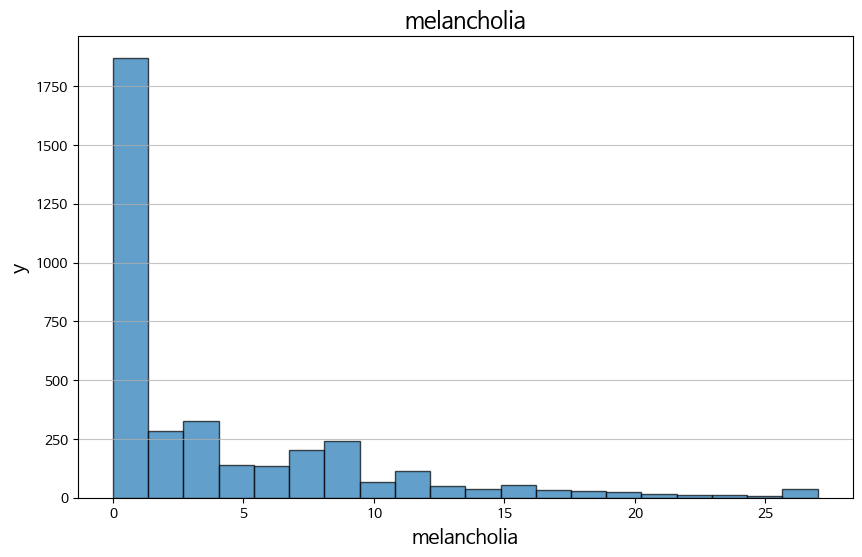

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_combined['우울증_지수'], bins=20, edgecolor='black', alpha=0.7)
plt.title('melancholia', fontsize=16)
plt.xlabel('melancholia', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
df= df_combined.copy()

In [ ]:
# 1, 2는 1로, 3, 4, 5, 6, 7은 2로 변환
df['현재 거주지 권역(7범주)'] = df['현재 거주지 권역(7범주)'].apply(lambda x: 1 if x in [1, 2] else 2)

# 원핫인코딩 적용
df = pd.get_dummies(df, columns=['현재 거주지 권역(7범주)'], prefix='거주지')
# 경제활동유형(3범주)을 원핫인코딩
df = pd.get_dummies(df, columns=['경제활동유형(3 범주)'], prefix='경제활동')
# 혼인 상태 컬럼을 원핫인코딩하는 코드
df = pd.get_dummies(df, columns=['혼인상태'], prefix='혼인상태')
# '비급여 금액 발생 여부 및 부담 방법' 컬럼에서 1을 제외한 모든 값을 2로 변환
df['비급여 금액 발생 여부 및 부담 방법'] = df['비급여 금액 발생 여부 및 부담 방법'].apply(lambda x: 1 if x == 1 else 2)

# 원핫인코딩 적용
df = pd.get_dummies(df, columns=['비급여 금액 발생 여부 및 부담 방법'], prefix='비급여')
# '지원여부 (5) 위로금' 컬럼을 원핫인코딩
df = pd.get_dummies(df, columns=['지원여부 (5) 위로금'], prefix='위로금')
# 교육훈련
df = pd.get_dummies(df, columns=['산업재해 발생 이후 교육훈련 경험 유무'], prefix='이후_교육훈련')
# '종사상 지위' 컬럼에서 4와 5를 4로 통일
df['종사상 지위'] = df['종사상 지위'].replace({5: 4})

# 원핫인코딩 적용
df = pd.get_dummies(df, columns=['종사상 지위'], prefix='종사상지위')
# 퇴직금
df = pd.get_dummies(df, columns=['제공여부-법정퇴직금'], prefix='법정퇴직금_지급')
#도움
df = pd.get_dummies(df, columns=['일상생활 도움 주는 사람 유무'], prefix='도움주는사람_여부')
# '흡연 여부', '음주 여부', '2022년 개인 근로소득 발생 여부' 컬럼을 원핫인코딩
df = pd.get_dummies(df, columns=['흡연 여부', '음주 여부', '2022년 개인 근로소득 발생 여부'],
                           prefix=['흡연', '음주', '근로소득발생'])

In [ ]:
df.columns

Index(['연령대(6범주)', '최종학력', '장해등급(15범주)', '요양기간', '최종학교', '자격증 보유 개수',
       '최초 의료기관 방문시점', '치료기간 적정 여부', '현재 업무수행능력', '한 달 평균 임금/소득',
       '한 달 평균 근무일수', '하루 평균 근무시간', '직장 동료들과의 관계', '직장동료 도움지지여부',
       '직장상사 도움지지여부', '일자리 만족도', '산재 이후 건강회복 정도', '산재 이후 통증 느끼는 횟수',
       '산재로 인한 통증이 일상 및 삶을 방해하는 정도', '현재 전반적인 건강상태',
       '산재 이후 일상생활에서 가족이나 타인의 도움 필요 정도', '1주 평균 운동일 수', '가구원 수', '우울증_지수',
       '거주지_1', '거주지_2', '경제활동_1', '경제활동_2', '경제활동_3', '혼인상태_1', '혼인상태_2',
       '혼인상태_3', '혼인상태_4', '혼인상태_5', '비급여_1', '비급여_2', '위로금_1', '위로금_2',
       '이후_교육훈련_1', '이후_교육훈련_2', '종사상지위_1', '종사상지위_2', '종사상지위_3', '종사상지위_4',
       '법정퇴직금_지급_1.0', '법정퇴직금_지급_2.0', '법정퇴직금_지급_3.0', '도움주는사람_여부_1',
       '도움주는사람_여부_2', '흡연_1', '흡연_2', '음주_1', '음주_2', '근로소득발생_1', '근로소득발생_2'],
      dtype='object')

In [ ]:
df_encoded = pd.get_dummies(df, columns=['도움주는사람_여부_1'])

# True/False를 0/1로 변환
df_encoded = df_encoded.astype(int)

print(df_encoded)

      연령대(6범주)  최종학력  장해등급(15범주)  요양기간  최종학교  자격증 보유 개수  최초 의료기관 방문시점  \
0            3     4           1     5     4          0             1   
1            3     4           3     6     6          0             1   
2            3     5           1     6     5          0             1   
3            3     4           1     6     4          0             1   
4            3     5           3     6     6          1             1   
...        ...   ...         ...   ...   ...        ...           ...   
3686         6     4          15     3     4          1             1   
3687         5     2          15     2     2          0             1   
3688         5     4          15     4     4          2             1   
3689         5     4          15     3     4          0             3   
3690         6     2          15     1     2          0             1   

      치료기간 적정 여부  현재 업무수행능력  한 달 평균 임금/소득  ...  법정퇴직금_지급_3.0  도움주는사람_여부_2  \
0              5          0           450  ...

In [ ]:
df_encoded.head()

,연령대(6범주),최종학력,장해등급(15범주),요양기간,최종학교,자격증 보유 개수,최초 의료기관 방문시점,치료기간 적정 여부,현재 업무수행능력,한 달 평균 임금/소득,...,법정퇴직금_지급_3.0,도움주는사람_여부_2,흡연_1,흡연_2,음주_1,음주_2,근로소득발생_1,근로소득발생_2,도움주는사람_여부_1_False,도움주는사람_여부_1_True
0,3,4,1,5,4,0,1,5,0,450,...,1,0,1,0,0,1,0,1,0,1
1,3,4,3,6,6,0,1,3,0,360,...,0,1,0,1,0,1,0,1,1,0
2,3,5,1,6,5,0,1,2,1,200,...,1,0,1,0,1,0,1,0,0,1
3,3,4,1,6,4,0,1,1,0,270,...,0,0,0,1,0,1,0,1,0,1
4,3,5,3,6,6,1,1,3,2,100,...,0,0,0,1,0,1,0,1,0,1


In [ ]:
df_encoded = df_encoded.drop(columns= '도움주는사람_여부_1_False')

In [ ]:
df = df_encoded.rename(columns={
    '도움주는사람_여부_1_True': '도움주는사람_여부_1',
})

##기본

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 데이터 준비
target = '우울증_지수'

# 타겟 변수 제외한 나머지를 입력 변수로 설정
features = [col for col in df.columns if col != target]

X = df[features].values  # 입력 변수
y = df[target].values.reshape(-1, 1)  # 타겟 변수 (2D 배열로 변환)

# K-Fold 설정
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# 교차검증 루프
fold = 1
fold_mae_scores = []

for train_idx, test_idx in kf.split(X, y):
    print(f"\nFold {fold}:")

    # 데이터 분할
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # NumPy 데이터를 PyTorch 텐서로 변환
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # 모델 초기화
    input_dim = X_train.shape[1]
    model = MLP(input_dim)

    # 2️⃣ **손실 함수 및 옵티마이저**
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # 학습 루프
    num_epochs = 200
    batch_size = 16

    # DataLoader를 사용한 배치 학습
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(num_epochs):
        model.train()  # 학습 모드
        epoch_loss = 0.0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

    print(f"Final Loss for Fold {fold}: {epoch_loss / len(train_loader):.4f}")

    # 평가
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test).numpy()
        y_pred_original = y_pred
        y_test_original = y_test.numpy()

        # MAE 계산
        mae = mean_absolute_error(y_test_original, y_pred_original)
        print(f"Fold {fold} Test MAE: {mae:.4f}")
        fold_mae_scores.append(mae)

    fold += 1

# 전체 Fold 결과
print(f"\nAverage MAE across folds: {np.mean(fold_mae_scores):.4f}")



Fold 1:
Final Loss for Fold 1: 16.9961
Fold 1 Test MAE: 3.3805

Fold 2:
Final Loss for Fold 2: 16.2782
Fold 2 Test MAE: 3.3915

Fold 3:
Final Loss for Fold 3: 17.3400
Fold 3 Test MAE: 3.3534

Average MAE across folds: 3.3752


In [ ]:
!pip install pytorch_tabnet

In [ ]:
!pip install optuna

In [ ]:
import xgboost as xgb
import optuna
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 랜덤 시드 설정
seed = 42
np.random.seed(seed)

# 데이터 준비
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=3, shuffle=True, random_state=seed)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=50),
        'objective': 'reg:squarederror',
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'lambda': trial.suggest_float('lambda', 1e-3, 10, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10, log=True),
        'eval_metric': 'mae'
    }

    fold_mae_scores = []
    fold = 1  # Fold 카운트

    for train_idx, test_idx in kf.split(X, y):
        print(f"\nFold {fold}:")  # ✅ PyTorch 코드처럼 Fold별 로그 출력

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        D_train = xgb.DMatrix(X_train, label=y_train)
        D_valid = xgb.DMatrix(X_test, label=y_test)

        # ✅ `xgb.train()`을 사용하여 Optuna의 하이퍼파라미터 튜닝 적용
        model = xgb.train(
            params=params,
            dtrain=D_train,
            num_boost_round=500,
            evals=[(D_valid, "Valid")],
            early_stopping_rounds=20,
            verbose_eval=False
        )

        # 예측 및 MAE 계산
        y_pred = model.predict(D_valid)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"Fold {fold} Test MAE: {mae:.4f}")  # ✅ PyTorch 코드처럼 Fold별 MAE 출력
        fold_mae_scores.append(mae)

        fold += 1  # Fold 증가

    return np.mean(fold_mae_scores)

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters:", study.best_params)

# ✅ 최적 하이퍼파라미터로 최종 학습 및 평가
best_params = study.best_params
fold_mae_scores = []
fold = 1

for train_idx, test_idx in kf.split(X, y):
    print(f"\nFold {fold}:")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    D_train = xgb.DMatrix(X_train, label=y_train)
    D_valid = xgb.DMatrix(X_test, label=y_test)

    model = xgb.train(
        params=best_params,
        dtrain=D_train,
        num_boost_round=500,
        evals=[(D_valid, "Valid")],
        early_stopping_rounds=20,
        verbose_eval=False
    )

    # 예측 및 MAE 계산
    y_pred = model.predict(D_valid)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Fold {fold} Test MAE: {mae:.4f}")  # ✅ Fold별 MAE 출력
    fold_mae_scores.append(mae)

    fold += 1

# ✅ 최종 MAE 출력 (PyTorch 코드와 동일하게)
print(f"\nAverage MAE across folds: {np.mean(fold_mae_scores):.4f}")


[I 2025-03-11 13:00:02,754] A new study created in memory with name: no-name-85eb19df-b023-4391-a5ca-d160553ecb01
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Fold 1:
Fold 1 Test MAE: 3.3685

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:03,056] Trial 0 finished with value: 3.353869835535685 and parameters: {'n_estimators': 1000, 'learning_rate': 0.08397242505149571, 'max_depth': 7, 'subsample': 0.9745890013287872, 'colsample_bytree': 0.7338373732559353, 'gamma': 0.20865232432121184, 'lambda': 0.010834686202323937, 'alpha': 0.20871373958011635}. Best is trial 0 with value: 3.353869835535685.


Fold 2 Test MAE: 3.3773

Fold 3:
Fold 3 Test MAE: 3.3158

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3560

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3462

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:04,330] Trial 1 finished with value: 3.35711677869161 and parameters: {'n_estimators': 200, 'learning_rate': 0.020007786388833375, 'max_depth': 9, 'subsample': 0.8467669021473165, 'colsample_bytree': 0.9782905320921577, 'gamma': 0.6161916562113923, 'lambda': 0.005447772276474931, 'alpha': 0.07193425456857974}. Best is trial 0 with value: 3.353869835535685.


Fold 3 Test MAE: 3.3691

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.6470

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.6402

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:05,243] Trial 2 finished with value: 3.631665070851644 and parameters: {'n_estimators': 250, 'learning_rate': 0.0022513438351515827, 'max_depth': 3, 'subsample': 0.7159256181739151, 'colsample_bytree': 0.6204309622562526, 'gamma': 4.430482157170747, 'lambda': 0.03299736844343092, 'alpha': 0.006102315389207127}. Best is trial 0 with value: 3.353869835535685.


Fold 3 Test MAE: 3.6078

Fold 1:
Fold 1 Test MAE: 3.3120

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:05,796] Trial 3 finished with value: 3.3210906982421875 and parameters: {'n_estimators': 500, 'learning_rate': 0.027262748609461956, 'max_depth': 3, 'subsample': 0.8797398810607688, 'colsample_bytree': 0.7106204713448113, 'gamma': 3.9984062832596217, 'lambda': 1.1841245561581244, 'alpha': 0.2782132839516796}. Best is trial 3 with value: 3.3210906982421875.


Fold 2 Test MAE: 3.3220

Fold 3:
Fold 3 Test MAE: 3.3293

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3948

Fold 2:
Fold 2 Test MAE: 3.3989

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:06,192] Trial 4 finished with value: 3.385537624359131 and parameters: {'n_estimators': 300, 'learning_rate': 0.07910462485297585, 'max_depth': 10, 'subsample': 0.9355834577977876, 'colsample_bytree': 0.9909424960246622, 'gamma': 4.032656128755892, 'lambda': 1.1953741460021758, 'alpha': 0.05138653445072268}. Best is trial 3 with value: 3.3210906982421875.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 Test MAE: 3.3629

Fold 1:
Fold 1 Test MAE: 3.2952

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3044

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:07,116] Trial 5 finished with value: 3.299158732096354 and parameters: {'n_estimators': 850, 'learning_rate': 0.013168934103630028, 'max_depth': 4, 'subsample': 0.6077495579111851, 'colsample_bytree': 0.735015731944456, 'gamma': 4.617354456543461, 'lambda': 0.002731144458631616, 'alpha': 2.883348200112655}. Best is trial 5 with value: 3.299158732096354.


Fold 3 Test MAE: 3.2979

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3343

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3655

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:09,886] Trial 6 finished with value: 3.3341403802235923 and parameters: {'n_estimators': 750, 'learning_rate': 0.00496709628524993, 'max_depth': 9, 'subsample': 0.909416814050209, 'colsample_bytree': 0.6423314308796024, 'gamma': 0.8982463636922783, 'lambda': 6.756910075391064, 'alpha': 0.0028059373763119214}. Best is trial 5 with value: 3.299158732096354.


Fold 3 Test MAE: 3.3026

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3665

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3770

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:10,542] Trial 7 finished with value: 3.363058169682821 and parameters: {'n_estimators': 100, 'learning_rate': 0.04532754357474614, 'max_depth': 10, 'subsample': 0.940786056182898, 'colsample_bytree': 0.9668780611112, 'gamma': 3.4915923965637385, 'lambda': 0.4986374313799726, 'alpha': 1.9676106913551048}. Best is trial 5 with value: 3.299158732096354.


Fold 3 Test MAE: 3.3457

Fold 1:
Fold 1 Test MAE: 3.2868

Fold 2:
Fold 2 Test MAE: 3.3417

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:10,794] Trial 8 finished with value: 3.3241360187530518 and parameters: {'n_estimators': 700, 'learning_rate': 0.08439824977427922, 'max_depth': 4, 'subsample': 0.8361348121110135, 'colsample_bytree': 0.7281120886163763, 'gamma': 0.020628187494947103, 'lambda': 0.0016033758089662269, 'alpha': 0.010100296147762502}. Best is trial 5 with value: 3.299158732096

Fold 3 Test MAE: 3.3439

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.4566

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.4681

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:12,361] Trial 9 finished with value: 3.4492650032043457 and parameters: {'n_estimators': 1000, 'learning_rate': 0.0036007081774904253, 'max_depth': 5, 'subsample': 0.961660046170876, 'colsample_bytree': 0.6131102782793041, 'gamma': 3.8415400622566227, 'lambda': 3.2010484005495217, 'alpha': 9.602678507252213}. Best is trial 5 with value: 3.299158732096354.


Fold 3 Test MAE: 3.4230

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2728

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3217

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:13,905] Trial 10 finished with value: 3.302236715952555 and parameters: {'n_estimators': 800, 'learning_rate': 0.009805280906914796, 'max_depth': 6, 'subsample': 0.5410635618045969, 'colsample_bytree': 0.8545657301526788, 'gamma': 2.2789576147771844, 'lambda': 0.12629273656738907, 'alpha': 1.6575259200893182}. Best is trial 5 with value: 3.299158732096354.


Fold 3 Test MAE: 3.3123

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2753

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3181

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:15,379] Trial 11 finished with value: 3.300902525583903 and parameters: {'n_estimators': 800, 'learning_rate': 0.009575193668327734, 'max_depth': 6, 'subsample': 0.5424116046709359, 'colsample_bytree': 0.8546253435905372, 'gamma': 2.2743348574395927, 'lambda': 0.13413614124978054, 'alpha': 1.9151203428176873}. Best is trial 5 with value: 3.299158732096354.


Fold 3 Test MAE: 3.3093

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2861

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3205

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:16,715] Trial 12 finished with value: 3.297151724497477 and parameters: {'n_estimators': 550, 'learning_rate': 0.010463736945484857, 'max_depth': 7, 'subsample': 0.5284297798536771, 'colsample_bytree': 0.851802427370398, 'gamma': 2.39820097657554, 'lambda': 0.11473966569660214, 'alpha': 8.804308082584228}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.2849

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2981

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3309

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:17,525] Trial 13 finished with value: 3.304401159286499 and parameters: {'n_estimators': 500, 'learning_rate': 0.018379102275741202, 'max_depth': 7, 'subsample': 0.616320036411609, 'colsample_bytree': 0.8407956636923937, 'gamma': 3.13106373978854, 'lambda': 0.001115216430474797, 'alpha': 9.57784627859857}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.2842

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.8241

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.8065

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:19,357] Trial 14 finished with value: 3.7965572675069175 and parameters: {'n_estimators': 600, 'learning_rate': 0.001024586678569403, 'max_depth': 8, 'subsample': 0.645046483164159, 'colsample_bytree': 0.8048283683296695, 'gamma': 1.5010485479939093, 'lambda': 0.02469535844428962, 'alpha': 0.7646483283694641}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.7591

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3355

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3488

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:20,423] Trial 15 finished with value: 3.3394468625386557 and parameters: {'n_estimators': 400, 'learning_rate': 0.006066177207076865, 'max_depth': 5, 'subsample': 0.5016142800900413, 'colsample_bytree': 0.537679272003718, 'gamma': 2.8294962610669545, 'lambda': 0.0739683076618397, 'alpha': 4.972922073668163}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.3340

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2983

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3058

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:21,198] Trial 16 finished with value: 3.303548494974772 and parameters: {'n_estimators': 900, 'learning_rate': 0.015267081496387147, 'max_depth': 5, 'subsample': 0.6329114249475806, 'colsample_bytree': 0.9111637440187506, 'gamma': 4.67603329851058, 'lambda': 0.004657564030980601, 'alpha': 0.5176425256311367}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.3066

Fold 1:
Fold 1 Test MAE: 3.3013

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:21,627] Trial 17 finished with value: 3.301306883494059 and parameters: {'n_estimators': 600, 'learning_rate': 0.03370682636438383, 'max_depth': 4, 'subsample': 0.7256325292803425, 'colsample_bytree': 0.781256173685493, 'gamma': 1.616622955879788, 'lambda': 0.42331962984375215, 'alpha': 3.5573613552459418}. Best is trial 12 with value: 3.297151724497477.


Fold 2 Test MAE: 3.2966

Fold 3:
Fold 3 Test MAE: 3.3060

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.5058

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.5254

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:23,499] Trial 18 finished with value: 3.5099085172017417 and parameters: {'n_estimators': 400, 'learning_rate': 0.00253055037845439, 'max_depth': 8, 'subsample': 0.5777691472485081, 'colsample_bytree': 0.682904379022846, 'gamma': 1.6396861085307521, 'lambda': 0.02618782076754805, 'alpha': 0.03036459786705991}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.4985

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3353

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3443

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:24,414] Trial 19 finished with value: 3.341242710749308 and parameters: {'n_estimators': 650, 'learning_rate': 0.0074889849531647795, 'max_depth': 4, 'subsample': 0.6647008308810141, 'colsample_bytree': 0.5011105979019228, 'gamma': 4.87018898988663, 'lambda': 0.0033226658678002885, 'alpha': 0.7117784439320355}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.3441

Fold 1:
Fold 1 Test MAE: 3.3053

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:24,812] Trial 20 finished with value: 3.319600820541382 and parameters: {'n_estimators': 850, 'learning_rate': 0.0410552928466495, 'max_depth': 6, 'subsample': 0.7772352882826566, 'colsample_bytree': 0.9110769506406994, 'gamma': 2.683852323980081, 'lambda': 0.2586796505735279, 'alpha': 4.062829662801354}. Best is trial 12 with value: 3.297151724497477.


Fold 2 Test MAE: 3.3316

Fold 3:
Fold 3 Test MAE: 3.3219

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2782

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3236

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:25,955] Trial 21 finished with value: 3.297328551610311 and parameters: {'n_estimators': 900, 'learning_rate': 0.012169976497929532, 'max_depth': 6, 'subsample': 0.5569634977820416, 'colsample_bytree': 0.8754059607014277, 'gamma': 2.221893138115988, 'lambda': 0.08477696454141063, 'alpha': 1.4076598422125857}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.2901

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3075

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3261

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:27,023] Trial 22 finished with value: 3.3227345943450928 and parameters: {'n_estimators': 900, 'learning_rate': 0.013631027485152984, 'max_depth': 7, 'subsample': 0.5921130159870914, 'colsample_bytree': 0.9061912343151186, 'gamma': 2.070942433307247, 'lambda': 0.05483635079632681, 'alpha': 1.263219012155755}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.3346

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3472

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3415

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:28,413] Trial 23 finished with value: 3.338686386744181 and parameters: {'n_estimators': 950, 'learning_rate': 0.011252089901316032, 'max_depth': 8, 'subsample': 0.5044987980103096, 'colsample_bytree': 0.7911562528646807, 'gamma': 3.169041048816002, 'lambda': 0.01218252130266289, 'alpha': 0.20353018353159005}. Best is trial 12 with value: 3.297151724497477.


Fold 3 Test MAE: 3.3274

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2699

Fold 2:
Fold 2 Test MAE: 3.3035

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:29,001] Trial 24 finished with value: 3.294232447942098 and parameters: {'n_estimators': 450, 'learning_rate': 0.021381755853828385, 'max_depth': 5, 'subsample': 0.6802876691046746, 'colsample_bytree': 0.819511613101773, 'gamma': 1.8925892499734425, 'lambda': 0.013104063250784658, 'alpha': 4.507948124311501}. Best is trial 24 with value: 3.294232447942098.


Fold 3 Test MAE: 3.3092

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3009

Fold 2:
Fold 2 Test MAE: 3.3194

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:29,561] Trial 25 finished with value: 3.3017923831939697 and parameters: {'n_estimators': 400, 'learning_rate': 0.02287549371847967, 'max_depth': 6, 'subsample': 0.6881138392802171, 'colsample_bytree': 0.8896900962005239, 'gamma': 1.1229417656148115, 'lambda': 0.22608837966278195, 'alpha': 6.056536263092468}. Best is trial 24 with value: 3.294232447942098.


Fold 3 Test MAE: 3.2851

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3179

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3487

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:30,678] Trial 26 finished with value: 3.3283448219299316 and parameters: {'n_estimators': 500, 'learning_rate': 0.007494151842714293, 'max_depth': 5, 'subsample': 0.777829203950613, 'colsample_bytree': 0.8239502851830613, 'gamma': 1.86374264526164, 'lambda': 0.011939254481068518, 'alpha': 0.40290063458238107}. Best is trial 24 with value: 3.294232447942098.


Fold 3 Test MAE: 3.3185

Fold 1:
Fold 1 Test MAE: 3.3270

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:31,088] Trial 27 finished with value: 3.3375118573506675 and parameters: {'n_estimators': 550, 'learning_rate': 0.049841716942434396, 'max_depth': 7, 'subsample': 0.5603089802004576, 'colsample_bytree': 0.9474085760905192, 'gamma': 2.5412363408423757, 'lambda': 0.04114444299482195, 'alpha': 0.001095746357632422}. Best is trial 24 with value: 3.2942324479420

Fold 2 Test MAE: 3.3321

Fold 3:
Fold 3 Test MAE: 3.3534

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3579

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3974

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:32,382] Trial 28 finished with value: 3.3761932055155435 and parameters: {'n_estimators': 700, 'learning_rate': 0.004514021756264693, 'max_depth': 6, 'subsample': 0.6774116532652782, 'colsample_bytree': 0.7726337031541489, 'gamma': 1.364391430997068, 'lambda': 0.09160792377318899, 'alpha': 1.0231426223980173}. Best is trial 24 with value: 3.294232447942098.


Fold 3 Test MAE: 3.3733

Fold 1:
Fold 1 Test MAE: 3.3229

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:32,854] Trial 29 finished with value: 3.3478711446126304 and parameters: {'n_estimators': 350, 'learning_rate': 0.028630728429664395, 'max_depth': 7, 'subsample': 0.5312652492771428, 'colsample_bytree': 0.8794831528957463, 'gamma': 2.0271913883683617, 'lambda': 0.01762193274615939, 'alpha': 0.11961334458440452}. Best is trial 24 with value: 3.29423244794209

Fold 2 Test MAE: 3.3546

Fold 3:
Fold 3 Test MAE: 3.3660

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:33,156] Trial 30 finished with value: 3.324587106704712 and parameters: {'n_estimators': 450, 'learning_rate': 0.06078940019600249, 'max_depth': 5, 'subsample': 0.5856449817717789, 'colsample_bytree': 0.9464680998086794, 'gamma': 0.5227946619411341, 'lambda': 0.006092899091287007, 'alpha': 5.933341070500184}. Best is trial 24 with value: 3.294232447942098.


Fold 1 Test MAE: 3.3142

Fold 2:
Fold 2 Test MAE: 3.3281

Fold 3:
Fold 3 Test MAE: 3.3314


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



Fold 1:
Fold 1 Test MAE: 3.2847

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.2967

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:33,997] Trial 31 finished with value: 3.296721617380778 and parameters: {'n_estimators': 1000, 'learning_rate': 0.014536834135315214, 'max_depth': 4, 'subsample': 0.6047545689468266, 'colsample_bytree': 0.763353570438245, 'gamma': 2.999746427073602, 'lambda': 0.0023899161336021504, 'alpha': 2.632976897958516}. Best is trial 24 with value: 3.294232447942098.


Fold 3 Test MAE: 3.3088

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2933

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:34,662] Trial 32 finished with value: 3.3054937521616616 and parameters: {'n_estimators': 1000, 'learning_rate': 0.018506821513488318, 'max_depth': 3, 'subsample': 0.6506404075547589, 'colsample_bytree': 0.7579926802067103, 'gamma': 3.020097049657731, 'lambda': 0.007506215509246476, 'alpha': 2.7291346174349083}. Best is trial 24 with value: 3.294232447942098.


Fold 2 Test MAE: 3.3014

Fold 3:
Fold 3 Test MAE: 3.3217

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3159

Fold 2:
Fold 2 Test MAE: 3.3247

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:35,258] Trial 33 finished with value: 3.3195718924204507 and parameters: {'n_estimators': 950, 'learning_rate': 0.02256107730122271, 'max_depth': 4, 'subsample': 0.9996238672955062, 'colsample_bytree': 0.8159348923949225, 'gamma': 2.37601408568383, 'lambda': 0.0018595819138941029, 'alpha': 9.97427034977809}. Best is trial 24 with value: 3.294232447942098.


Fold 3 Test MAE: 3.3181

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2958

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3234

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:36,383] Trial 34 finished with value: 3.306077798207601 and parameters: {'n_estimators': 200, 'learning_rate': 0.007963183570266482, 'max_depth': 5, 'subsample': 0.7127945252730441, 'colsample_bytree': 0.8603461126435206, 'gamma': 3.5767347381634416, 'lambda': 0.057207414556144746, 'alpha': 2.7321088171543826}. Best is trial 24 with value: 3.294232447942098.


Fold 3 Test MAE: 3.2990

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2881

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3113

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:37,350] Trial 35 finished with value: 3.292530377705892 and parameters: {'n_estimators': 600, 'learning_rate': 0.015176642506574897, 'max_depth': 6, 'subsample': 0.5639883110436343, 'colsample_bytree': 0.693992122400459, 'gamma': 1.8676427047386925, 'lambda': 0.016295918342431246, 'alpha': 6.136363903291891}. Best is trial 35 with value: 3.292530377705892.


Fold 3 Test MAE: 3.2782

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2988

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3016

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:38,041] Trial 36 finished with value: 3.301911989847819 and parameters: {'n_estimators': 300, 'learning_rate': 0.016787872297688126, 'max_depth': 3, 'subsample': 0.6158600980139596, 'colsample_bytree': 0.6863732344652341, 'gamma': 1.8417589692787761, 'lambda': 0.01583818376885624, 'alpha': 6.294285445017498}. Best is trial 35 with value: 3.292530377705892.


Fold 3 Test MAE: 3.3053

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2722

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3372

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:38,751] Trial 37 finished with value: 3.2989509105682373 and parameters: {'n_estimators': 600, 'learning_rate': 0.03130424753764824, 'max_depth': 8, 'subsample': 0.6958549621555384, 'colsample_bytree': 0.6571007298434904, 'gamma': 1.286477456562026, 'lambda': 0.006830661344933762, 'alpha': 4.224275737038026}. Best is trial 35 with value: 3.292530377705892.


Fold 3 Test MAE: 3.2874

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2864

Fold 2:
Fold 2 Test MAE: 3.2946

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:39,359] Trial 38 finished with value: 3.296215613683065 and parameters: {'n_estimators': 550, 'learning_rate': 0.023126427139139646, 'max_depth': 4, 'subsample': 0.5218816854681008, 'colsample_bytree': 0.7400540461892067, 'gamma': 2.8099123905328054, 'lambda': 0.0033668738051281745, 'alpha': 2.2364975839854706}. Best is trial 35 with value: 3.292530377705892.


Fold 3 Test MAE: 3.3076

Fold 1:
Fold 1 Test MAE: 3.3211

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:39,996] Trial 39 finished with value: 3.3106272220611572 and parameters: {'n_estimators': 450, 'learning_rate': 0.023841962097907766, 'max_depth': 4, 'subsample': 0.5700034286764385, 'colsample_bytree': 0.7064082922255068, 'gamma': 3.441867513804757, 'lambda': 0.0030835661579944463, 'alpha': 0.20465269521538645}. Best is trial 35 with value: 3.2925303777058

Fold 2 Test MAE: 3.2925

Fold 3:
Fold 3 Test MAE: 3.3183

Fold 1:
Fold 1 Test MAE: 3.3048

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:40,406] Trial 40 finished with value: 3.3164219856262207 and parameters: {'n_estimators': 700, 'learning_rate': 0.0368431767753637, 'max_depth': 4, 'subsample': 0.7563943749885975, 'colsample_bytree': 0.7448664685848918, 'gamma': 4.215087634585448, 'lambda': 0.002319478129089579, 'alpha': 0.01935834113640999}. Best is trial 35 with value: 3.292530377705892.

Fold 2 Test MAE: 3.3189

Fold 3:
Fold 3 Test MAE: 3.3255

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2867

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3177

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:41,222] Trial 41 finished with value: 3.304749011993408 and parameters: {'n_estimators': 550, 'learning_rate': 0.015535500570232657, 'max_depth': 3, 'subsample': 0.5255662153963229, 'colsample_bytree': 0.717109086366972, 'gamma': 2.7489441974485853, 'lambda': 0.001000621461163818, 'alpha': 2.947032268890891}. Best is trial 35 with value: 3.292530377705892.


Fold 3 Test MAE: 3.3098

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2977

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3196

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:42,252] Trial 42 finished with value: 3.3070696194966636 and parameters: {'n_estimators': 100, 'learning_rate': 0.009862817268583396, 'max_depth': 5, 'subsample': 0.6083838279980054, 'colsample_bytree': 0.6077752077264277, 'gamma': 2.5240647853841174, 'lambda': 0.004231507259647489, 'alpha': 2.0883480579156837}. Best is trial 35 with value: 3.292530377705892.


Fold 3 Test MAE: 3.3039

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2892

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3095

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:43,078] Trial 43 finished with value: 3.2917051315307617 and parameters: {'n_estimators': 650, 'learning_rate': 0.026257337187746796, 'max_depth': 9, 'subsample': 0.5078771260229435, 'colsample_bytree': 0.7643080281525076, 'gamma': 2.9929098591476055, 'lambda': 0.008507664395265785, 'alpha': 6.963965356016991}. Best is trial 43 with value: 3.2917051315307617.


Fold 3 Test MAE: 3.2763

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3174

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3310

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:44,160] Trial 44 finished with value: 3.3222197691599527 and parameters: {'n_estimators': 650, 'learning_rate': 0.01931757714090521, 'max_depth': 9, 'subsample': 0.5086881278215493, 'colsample_bytree': 0.7604604988470159, 'gamma': 2.909294766162971, 'lambda': 0.008172279436887211, 'alpha': 1.1075367700053447}. Best is trial 43 with value: 3.2917051315307617.


Fold 3 Test MAE: 3.3183

Fold 1:
Fold 1 Test MAE: 3.3024

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:44,569] Trial 45 finished with value: 3.3565760453542075 and parameters: {'n_estimators': 750, 'learning_rate': 0.06374316860023847, 'max_depth': 9, 'subsample': 0.5566697485960137, 'colsample_bytree': 0.6857489736090963, 'gamma': 3.314818845843633, 'lambda': 0.0016761549619391735, 'alpha': 6.27791957277203}. Best is trial 43 with value: 3.2917051315307617.

Fold 2 Test MAE: 3.4203

Fold 3:
Fold 3 Test MAE: 3.3471

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2895

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 Test MAE: 3.3578

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:45,385] Trial 46 finished with value: 3.329275210698446 and parameters: {'n_estimators': 450, 'learning_rate': 0.027641985523916193, 'max_depth': 10, 'subsample': 0.589046393321801, 'colsample_bytree': 0.7351988321443, 'gamma': 3.6818509387481138, 'lambda': 0.01948724413356695, 'alpha': 1.968178405160438}. Best is trial 43 with value: 3.2917051315307617.


Fold 3 Test MAE: 3.3405

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.2766

Fold 2:
Fold 2 Test MAE: 3.3068

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:45,935] Trial 47 finished with value: 3.294006109237671 and parameters: {'n_estimators': 500, 'learning_rate': 0.023918095488091644, 'max_depth': 4, 'subsample': 0.6296547126550436, 'colsample_bytree': 0.6457869485188296, 'gamma': 0.903752023822472, 'lambda': 0.00883625312428476, 'alpha': 4.48426270650178}. Best is trial 43 with value: 3.2917051315307617.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 Test MAE: 3.2987

Fold 1:
Fold 1 Test MAE: 3.3041

Fold 2:
Fold 2 Test MAE: 3.3047

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:46,255] Trial 48 finished with value: 3.3052639961242676 and parameters: {'n_estimators': 500, 'learning_rate': 0.049864663435749065, 'max_depth': 3, 'subsample': 0.5181758582100258, 'colsample_bytree': 0.5836228265851698, 'gamma': 0.6191688209345774, 'lambda': 0.010549392668727047, 'alpha': 6.953542926496535}. Best is trial 43 with value: 3.2917051315307617.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarnin

Fold 3 Test MAE: 3.3070

Fold 1:
Fold 1 Test MAE: 3.3110

Fold 2:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-03-11 13:00:46,820] Trial 49 finished with value: 3.302531639734904 and parameters: {'n_estimators': 650, 'learning_rate': 0.024161863338413157, 'max_depth': 5, 'subsample': 0.6408318871575175, 'colsample_bytree': 0.5905038029897569, 'gamma': 0.939044511172334, 'lambda': 0.036371973568729545, 'alpha': 4.841912277473866}. Best is trial 43 with value: 3.2917051315307617.


Fold 2 Test MAE: 3.2992

Fold 3:
Fold 3 Test MAE: 3.2974
Best Hyperparameters: {'n_estimators': 650, 'learning_rate': 0.026257337187746796, 'max_depth': 9, 'subsample': 0.5078771260229435, 'colsample_bytree': 0.7643080281525076, 'gamma': 2.9929098591476055, 'lambda': 0.008507664395265785, 'alpha': 6.963965356016991}

Fold 1:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 Test MAE: 3.3115

Fold 2:
Fold 2 Test MAE: 3.3114

Fold 3:


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 Test MAE: 3.3011

Average MAE across folds: 3.3080


In [ ]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 랜덤 시드 설정
seed = 42
np.random.seed(seed)

# 데이터 준비
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=3, shuffle=True, random_state=seed)

# ✅ 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 300, 500, 1000],  # 트리 개수
    'learning_rate': [0.001, 0.05, 0.1],  # 학습률
    'max_depth': [3, 5, 7],  # 트리 깊이
    'subsample': [0.5, 0.7, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.5, 0.7, 1.0],  # 컬럼 샘플링 비율
    'lambda': [0.001, 1, 10],  # L2 정규화
    'alpha': [0.001, 1, 10]  # L1 정규화
}

# XGBoost 모델 초기화
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='mae', random_state=seed)

# ✅ GridSearchCV 설정 (3-Fold 교차 검증, MAE 최소화)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),  # MAE를 최소화
    cv=kf,
    verbose=3,
    n_jobs=-1  # 모든 코어 사용
)

# GridSearch 실행
grid_search.fit(X, y.ravel())

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

# ✅ 최적 하이퍼파라미터로 최종 학습 및 평가
best_params = grid_search.best_params_
fold_mae_scores = []
fold = 1

for train_idx, test_idx in kf.split(X, y):
    print(f"\nFold {fold}:")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 최적 하이퍼파라미터 기반 XGBoost 모델 생성
    model = xgb.XGBRegressor(**best_params, objective='reg:squarederror', eval_metric='mae', random_state=seed)

    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 MAE 계산
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Fold {fold} Test MAE: {mae:.4f}")
    fold_mae_scores.append(mae)

    fold += 1

# ✅ 최종 평균 MAE 출력
print(f"\nAverage MAE across folds: {np.mean(fold_mae_scores):.4f}")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
Best Hyperparameters: {'alpha': 1, 'colsample_bytree': 1.0, 'lambda': 10, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.5}

Fold 1:
Fold 1 Test MAE: 3.2598

Fold 2:
Fold 2 Test MAE: 3.3009

Fold 3:
Fold 3 Test MAE: 3.2246

Average MAE across folds: 3.2618


In [ ]:
import time
from sklearn.model_selection import train_test_split

# 10% 데이터만 사용하여 실행 시간 예측
X_sample, _, y_sample, _ = train_test_split(X, y, test_size=0.99, random_state=seed)

start_time = time.time()
grid_search.fit(X_sample, y_sample.ravel())
end_time = time.time()

elapsed_time = end_time - start_time
estimated_full_time = elapsed_time * 100  # 전체 데이터 크기에 비례하여 예측

print(f"샘플 실행 시간: {elapsed_time:.2f} 초")
print(f"예상 전체 실행 시간: {estimated_full_time:.2f} 초")
print(f"예상 전체 실행 시간: {estimated_full_time / 60:.2f} 분")
print(f"예상 전체 실행 시간: {estimated_full_time / 3600:.2f} 시간")


Fitting 3 folds for each of 2916 candidates, totalling 8748 fits
샘플 실행 시간: 85.58 초
예상 전체 실행 시간: 8557.52 초
예상 전체 실행 시간: 142.63 분
예상 전체 실행 시간: 2.38 시간


In [ ]:
!pip install catboost
import numpy as np
import optuna
import catboost
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 랜덤 시드 설정
seed = 42
np.random.seed(seed)

# 데이터 준비
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=3, shuffle=True, random_state=seed)

# ✅ Optuna를 사용한 CatBoost 하이퍼파라미터 튜닝
def objective(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000, step=100),  # 트리 개수
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),  # 학습률
        "depth": trial.suggest_int("depth", 4, 10),  # 트리 깊이
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),  # L2 정규화
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),  # 샘플링 강도
        "border_count": trial.suggest_int("border_count", 32, 255),  # 분할 수
        "random_strength": trial.suggest_float("random_strength", 1e-9, 10.0, log=True),  # 랜덤 노이즈
        "loss_function": "MAE",
        "random_seed": seed,
        "verbose": 0
    }

    fold_mae_scores = []
    fold = 1

    for train_idx, test_idx in kf.split(X, y):
        print(f"\nFold {fold}:")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # ✅ CatBoost 모델 학습
        model = CatBoostRegressor(**params)
        model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20, verbose=False)

        # 예측 및 MAE 계산
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"Fold {fold} Test MAE: {mae:.4f}")
        fold_mae_scores.append(mae)

        fold += 1

    return np.mean(fold_mae_scores)

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters:", study.best_params)

# ✅ 최적 하이퍼파라미터로 최종 학습 및 평가
best_params = study.best_params
fold_mae_scores = []
fold = 1

for train_idx, test_idx in kf.split(X, y):
    print(f"\nFold {fold}:")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # ✅ 최적 하이퍼파라미터 기반 CatBoost 모델 생성
    model = CatBoostRegressor(**best_params, loss_function="MAE", random_seed=seed, verbose=0)

    # 모델 학습
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=20, verbose=False)

    # 예측 및 MAE 계산
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Fold {fold} Test MAE: {mae:.4f}")
    fold_mae_scores.append(mae)

    fold += 1

# ✅ 최종 평균 MAE 출력
print(f"\nAverage MAE across folds: {np.mean(fold_mae_scores):.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 20.0 MB/s eta 0:00:00


[I 2025-03-11 13:43:22,756] A new study created in memory with name: no-name-fbb4a536-4949-4d96-a0fc-62e1f5a5f776



Fold 1:
Fold 1 Test MAE: 3.0277

Fold 2:
Fold 2 Test MAE: 3.1160

Fold 3:


[I 2025-03-11 13:43:24,384] Trial 0 finished with value: 3.0559562476922775 and parameters: {'iterations': 200, 'learning_rate': 0.029550403303084057, 'depth': 7, 'l2_leaf_reg': 1.0238733875092396, 'bagging_temperature': 0.6246889020833766, 'border_count': 224, 'random_strength': 5.0971955297867914e-08}. Best is trial 0 with value: 3.0559562476922775.


Fold 3 Test MAE: 3.0241

Fold 1:
Fold 1 Test MAE: 2.9983

Fold 2:
Fold 2 Test MAE: 3.0751

Fold 3:


[I 2025-03-11 13:43:25,681] Trial 1 finished with value: 3.0210738848947685 and parameters: {'iterations': 600, 'learning_rate': 0.042855489611658415, 'depth': 6, 'l2_leaf_reg': 9.228806605999832, 'bagging_temperature': 0.44508157297941464, 'border_count': 218, 'random_strength': 0.8497266891308358}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 2.9899

Fold 1:
Fold 1 Test MAE: 3.0328

Fold 2:
Fold 2 Test MAE: 3.1332

Fold 3:


[I 2025-03-11 13:43:27,822] Trial 2 finished with value: 3.064902666943903 and parameters: {'iterations': 800, 'learning_rate': 0.01046035290928671, 'depth': 4, 'l2_leaf_reg': 5.5468957376675, 'bagging_temperature': 0.9805658914180255, 'border_count': 132, 'random_strength': 6.937339200832775e-08}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0287

Fold 1:
Fold 1 Test MAE: 3.1146

Fold 2:
Fold 2 Test MAE: 3.1758

Fold 3:


[I 2025-03-11 13:43:32,265] Trial 3 finished with value: 3.1266088264135625 and parameters: {'iterations': 500, 'learning_rate': 0.034559191543477204, 'depth': 10, 'l2_leaf_reg': 7.026139436086617, 'bagging_temperature': 0.7677724652943746, 'border_count': 75, 'random_strength': 0.00010724193771550873}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0894

Fold 1:
Fold 1 Test MAE: 3.2356

Fold 2:
Fold 2 Test MAE: 3.1820

Fold 3:


[I 2025-03-11 13:43:33,551] Trial 4 finished with value: 3.194739340121604 and parameters: {'iterations': 200, 'learning_rate': 0.18990583552774462, 'depth': 10, 'l2_leaf_reg': 4.568466895108251, 'bagging_temperature': 0.3854309742624188, 'border_count': 85, 'random_strength': 8.551135422904422e-06}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.1666

Fold 1:
Fold 1 Test MAE: 3.0155

Fold 2:
Fold 2 Test MAE: 3.1133

Fold 3:


[I 2025-03-11 13:43:34,377] Trial 5 finished with value: 3.052467898530958 and parameters: {'iterations': 300, 'learning_rate': 0.06252694499671427, 'depth': 4, 'l2_leaf_reg': 6.154574201387186, 'bagging_temperature': 0.8841861939034202, 'border_count': 108, 'random_strength': 0.00038371848518557587}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0286

Fold 1:
Fold 1 Test MAE: 3.0970

Fold 2:
Fold 2 Test MAE: 3.1614

Fold 3:


[I 2025-03-11 13:43:35,712] Trial 6 finished with value: 3.09885360530185 and parameters: {'iterations': 100, 'learning_rate': 0.024570816847665152, 'depth': 8, 'l2_leaf_reg': 4.767497090471521, 'bagging_temperature': 0.20112642465915576, 'border_count': 51, 'random_strength': 2.0624770583757893e-09}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0381

Fold 1:
Fold 1 Test MAE: 3.1480

Fold 2:
Fold 2 Test MAE: 3.1792

Fold 3:


[I 2025-03-11 13:43:38,898] Trial 7 finished with value: 3.1451018208345354 and parameters: {'iterations': 100, 'learning_rate': 0.02357674701678935, 'depth': 10, 'l2_leaf_reg': 6.453275862911047, 'bagging_temperature': 0.13014840512880343, 'border_count': 101, 'random_strength': 0.0016279402225934478}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.1081

Fold 1:
Fold 1 Test MAE: 3.0195

Fold 2:
Fold 2 Test MAE: 3.1031

Fold 3:


[I 2025-03-11 13:43:40,988] Trial 8 finished with value: 3.051529197741577 and parameters: {'iterations': 800, 'learning_rate': 0.01485438570086312, 'depth': 4, 'l2_leaf_reg': 9.950573054765878, 'bagging_temperature': 0.03208967093154225, 'border_count': 117, 'random_strength': 0.03937240250980392}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0320

Fold 1:
Fold 1 Test MAE: 3.0340

Fold 2:
Fold 2 Test MAE: 3.1186

Fold 3:


[I 2025-03-11 13:43:42,385] Trial 9 finished with value: 3.0596359929924977 and parameters: {'iterations': 600, 'learning_rate': 0.04517704658378395, 'depth': 7, 'l2_leaf_reg': 3.5904854402791404, 'bagging_temperature': 0.2056557350734819, 'border_count': 156, 'random_strength': 9.858556770932766e-08}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0263

Fold 1:
Fold 1 Test MAE: 3.0820

Fold 2:
Fold 2 Test MAE: 3.0709

Fold 3:


[I 2025-03-11 13:43:43,249] Trial 10 finished with value: 3.0580519553146144 and parameters: {'iterations': 1000, 'learning_rate': 0.1064668723199278, 'depth': 6, 'l2_leaf_reg': 9.91684161949103, 'bagging_temperature': 0.4480275445393044, 'border_count': 255, 'random_strength': 8.592252297843492}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0212

Fold 1:
Fold 1 Test MAE: 3.0033

Fold 2:
Fold 2 Test MAE: 3.0835

Fold 3:


[I 2025-03-11 13:43:45,895] Trial 11 finished with value: 3.0366788055849843 and parameters: {'iterations': 700, 'learning_rate': 0.011151019668326056, 'depth': 5, 'l2_leaf_reg': 9.495824835942162, 'bagging_temperature': 0.027008382375011575, 'border_count': 182, 'random_strength': 0.3970868970113849}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0232

Fold 1:
Fold 1 Test MAE: 3.0298

Fold 2:
Fold 2 Test MAE: 3.0875

Fold 3:


[I 2025-03-11 13:43:46,880] Trial 12 finished with value: 3.05274201186946 and parameters: {'iterations': 600, 'learning_rate': 0.0859880044126475, 'depth': 6, 'l2_leaf_reg': 8.31471905643816, 'bagging_temperature': 0.35459351086691765, 'border_count': 186, 'random_strength': 8.206024108927837}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0410

Fold 1:
Fold 1 Test MAE: 3.0730

Fold 2:


[I 2025-03-11 13:43:47,371] Trial 13 finished with value: 3.085407353232236 and parameters: {'iterations': 800, 'learning_rate': 0.27572198323296204, 'depth': 5, 'l2_leaf_reg': 8.589997647393417, 'bagging_temperature': 0.6086729386099442, 'border_count': 190, 'random_strength': 0.08127315560765383}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1379

Fold 3:
Fold 3 Test MAE: 3.0453

Fold 1:
Fold 1 Test MAE: 3.0077

Fold 2:
Fold 2 Test MAE: 3.1044

Fold 3:


[I 2025-03-11 13:43:49,534] Trial 14 finished with value: 3.0467134823847375 and parameters: {'iterations': 500, 'learning_rate': 0.01554827218423355, 'depth': 6, 'l2_leaf_reg': 8.525879138259876, 'bagging_temperature': 0.03907828604695873, 'border_count': 199, 'random_strength': 0.1952188391797261}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0280

Fold 1:
Fold 1 Test MAE: 3.0156

Fold 2:
Fold 2 Test MAE: 3.1105

Fold 3:


[I 2025-03-11 13:43:54,566] Trial 15 finished with value: 3.0510537523035346 and parameters: {'iterations': 700, 'learning_rate': 0.010172512915439413, 'depth': 8, 'l2_leaf_reg': 7.424634627740203, 'bagging_temperature': 0.30639326598472255, 'border_count': 165, 'random_strength': 0.558918458820174}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0270

Fold 1:
Fold 1 Test MAE: 3.0108

Fold 2:
Fold 2 Test MAE: 3.1130

Fold 3:


[I 2025-03-11 13:43:55,166] Trial 16 finished with value: 3.0478008656369044 and parameters: {'iterations': 1000, 'learning_rate': 0.102789494830898, 'depth': 5, 'l2_leaf_reg': 8.986216481158236, 'bagging_temperature': 0.5603135521550743, 'border_count': 246, 'random_strength': 0.004065186177250259}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0196

Fold 1:
Fold 1 Test MAE: 3.0167

Fold 2:
Fold 2 Test MAE: 3.1299

Fold 3:


[I 2025-03-11 13:43:56,679] Trial 17 finished with value: 3.0597584366330643 and parameters: {'iterations': 400, 'learning_rate': 0.017295590096681978, 'depth': 5, 'l2_leaf_reg': 2.704346981147049, 'bagging_temperature': 0.7089770523308763, 'border_count': 220, 'random_strength': 4.6851516146536245e-06}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0326

Fold 1:
Fold 1 Test MAE: 3.0148

Fold 2:
Fold 2 Test MAE: 3.1668

Fold 3:


[I 2025-03-11 13:43:58,009] Trial 18 finished with value: 3.078509597134236 and parameters: {'iterations': 700, 'learning_rate': 0.051055253730383734, 'depth': 8, 'l2_leaf_reg': 7.575146394457855, 'bagging_temperature': 0.4797915247535083, 'border_count': 217, 'random_strength': 0.010891448823045841}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0539

Fold 1:
Fold 1 Test MAE: 2.9958

Fold 2:
Fold 2 Test MAE: 3.0930

Fold 3:


[I 2025-03-11 13:43:58,867] Trial 19 finished with value: 3.0373298292623314 and parameters: {'iterations': 900, 'learning_rate': 0.07525349221166854, 'depth': 6, 'l2_leaf_reg': 9.279022413886079, 'bagging_temperature': 0.2937752443036425, 'border_count': 173, 'random_strength': 0.9648366339947726}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0232

Fold 1:
Fold 1 Test MAE: 3.0139

Fold 2:


[I 2025-03-11 13:43:59,527] Trial 20 finished with value: 3.043321342993293 and parameters: {'iterations': 400, 'learning_rate': 0.15101330521162698, 'depth': 5, 'l2_leaf_reg': 7.691397257679876, 'bagging_temperature': 0.16484511150353853, 'border_count': 142, 'random_strength': 1.1789549368916798}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1048

Fold 3:
Fold 3 Test MAE: 3.0113

Fold 1:
Fold 1 Test MAE: 3.0264

Fold 2:
Fold 2 Test MAE: 3.0910

Fold 3:


[I 2025-03-11 13:44:00,458] Trial 21 finished with value: 3.0473015779299257 and parameters: {'iterations': 900, 'learning_rate': 0.08050912705675635, 'depth': 6, 'l2_leaf_reg': 9.689429611674308, 'bagging_temperature': 0.28660059200609594, 'border_count': 171, 'random_strength': 0.7675094391404923}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0246

Fold 1:
Fold 1 Test MAE: 3.0750

Fold 2:
Fold 2 Test MAE: 3.1004

Fold 3:


[I 2025-03-11 13:44:01,759] Trial 22 finished with value: 3.0638454267768984 and parameters: {'iterations': 700, 'learning_rate': 0.04252158029662665, 'depth': 7, 'l2_leaf_reg': 9.18301556927889, 'bagging_temperature': 0.001209649750478825, 'border_count': 204, 'random_strength': 0.024992603170852588}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0161

Fold 1:
Fold 1 Test MAE: 3.0026

Fold 2:
Fold 2 Test MAE: 3.0824

Fold 3:


[I 2025-03-11 13:44:02,786] Trial 23 finished with value: 3.0296561594039644 and parameters: {'iterations': 900, 'learning_rate': 0.06413626124188943, 'depth': 6, 'l2_leaf_reg': 7.94703051788321, 'bagging_temperature': 0.4119662801263139, 'border_count': 175, 'random_strength': 2.164487239624801}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0039

Fold 1:
Fold 1 Test MAE: 3.0385

Fold 2:
Fold 2 Test MAE: 3.1166

Fold 3:


[I 2025-03-11 13:44:03,464] Trial 24 finished with value: 3.055836561230658 and parameters: {'iterations': 900, 'learning_rate': 0.14055735610244996, 'depth': 5, 'l2_leaf_reg': 7.993532054675876, 'bagging_temperature': 0.42474270748493675, 'border_count': 242, 'random_strength': 2.9247990375585986}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0124

Fold 1:
Fold 1 Test MAE: 3.0157

Fold 2:
Fold 2 Test MAE: 3.1148

Fold 3:


[I 2025-03-11 13:44:04,438] Trial 25 finished with value: 3.0554412099960118 and parameters: {'iterations': 600, 'learning_rate': 0.05993142679254507, 'depth': 7, 'l2_leaf_reg': 6.971791469098854, 'bagging_temperature': 0.719674691236558, 'border_count': 146, 'random_strength': 0.16225381274167494}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0358

Fold 1:
Fold 1 Test MAE: 3.0566

Fold 2:
Fold 2 Test MAE: 3.1550

Fold 3:


[I 2025-03-11 13:44:08,288] Trial 26 finished with value: 3.0817481698267755 and parameters: {'iterations': 700, 'learning_rate': 0.020612345397590357, 'depth': 9, 'l2_leaf_reg': 8.931215762442289, 'bagging_temperature': 0.5211179277990011, 'border_count': 184, 'random_strength': 0.0012241433353134788}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0336

Fold 1:
Fold 1 Test MAE: 3.0060

Fold 2:
Fold 2 Test MAE: 3.1309

Fold 3:


[I 2025-03-11 13:44:09,788] Trial 27 finished with value: 3.052570707426739 and parameters: {'iterations': 800, 'learning_rate': 0.031128156102973047, 'depth': 6, 'l2_leaf_reg': 8.040347217255515, 'bagging_temperature': 0.09355544170578281, 'border_count': 231, 'random_strength': 0.012569585693946266}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0209

Fold 1:
Fold 1 Test MAE: 3.0052

Fold 2:
Fold 2 Test MAE: 3.1174

Fold 3:


[I 2025-03-11 13:44:10,855] Trial 28 finished with value: 3.045524923192284 and parameters: {'iterations': 500, 'learning_rate': 0.040684207965725125, 'depth': 5, 'l2_leaf_reg': 9.389423164206049, 'bagging_temperature': 0.24634431353721442, 'border_count': 205, 'random_strength': 0.1874364626857425}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0140

Fold 1:
Fold 1 Test MAE: 3.0228

Fold 2:
Fold 2 Test MAE: 3.0802

Fold 3:


[I 2025-03-11 13:44:14,469] Trial 29 finished with value: 3.042564215761953 and parameters: {'iterations': 900, 'learning_rate': 0.012663567738557655, 'depth': 7, 'l2_leaf_reg': 6.412158009158318, 'bagging_temperature': 0.6252817279396957, 'border_count': 216, 'random_strength': 9.534056082695107}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0247

Fold 1:
Fold 1 Test MAE: 3.0119

Fold 2:
Fold 2 Test MAE: 3.0965

Fold 3:


[I 2025-03-11 13:44:15,715] Trial 30 finished with value: 3.045843852397374 and parameters: {'iterations': 400, 'learning_rate': 0.03371817223987393, 'depth': 4, 'l2_leaf_reg': 1.0415535845099395, 'bagging_temperature': 0.3600902758520821, 'border_count': 161, 'random_strength': 1.0922038375604326e-05}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0291

Fold 1:
Fold 1 Test MAE: 3.0289

Fold 2:
Fold 2 Test MAE: 3.0764

Fold 3:


[I 2025-03-11 13:44:16,615] Trial 31 finished with value: 3.0422589506975535 and parameters: {'iterations': 1000, 'learning_rate': 0.06851967842204341, 'depth': 6, 'l2_leaf_reg': 9.217837256579928, 'bagging_temperature': 0.30832336060333765, 'border_count': 177, 'random_strength': 2.059349227530223}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0215

Fold 1:
Fold 1 Test MAE: 3.0229

Fold 2:
Fold 2 Test MAE: 3.0921

Fold 3:


[I 2025-03-11 13:44:17,444] Trial 32 finished with value: 3.044297277505209 and parameters: {'iterations': 900, 'learning_rate': 0.0783457277438251, 'depth': 6, 'l2_leaf_reg': 8.725052524171478, 'bagging_temperature': 0.5431753168961724, 'border_count': 126, 'random_strength': 0.5106120203626674}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0179

Fold 1:
Fold 1 Test MAE: 3.0130

Fold 2:
Fold 2 Test MAE: 3.0801

Fold 3:


[I 2025-03-11 13:44:18,464] Trial 33 finished with value: 3.036228381166758 and parameters: {'iterations': 800, 'learning_rate': 0.09497475542782956, 'depth': 7, 'l2_leaf_reg': 9.497037801976411, 'bagging_temperature': 0.45239135929955576, 'border_count': 148, 'random_strength': 2.26671318527625}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0156

Fold 1:
Fold 1 Test MAE: 3.0302

Fold 2:
Fold 2 Test MAE: 3.0661

Fold 3:


[I 2025-03-11 13:44:19,366] Trial 34 finished with value: 3.047228197437264 and parameters: {'iterations': 800, 'learning_rate': 0.1120279555934242, 'depth': 7, 'l2_leaf_reg': 9.98195532035494, 'bagging_temperature': 0.40528797474178907, 'border_count': 148, 'random_strength': 2.8492787657433407}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0454

Fold 1:
Fold 1 Test MAE: 3.1306

Fold 2:


[I 2025-03-11 13:44:19,997] Trial 35 finished with value: 3.1393452743056827 and parameters: {'iterations': 700, 'learning_rate': 0.2585591039430988, 'depth': 8, 'l2_leaf_reg': 5.424726429573715, 'bagging_temperature': 0.8564319756613059, 'border_count': 197, 'random_strength': 0.07650271526590383}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1834

Fold 3:
Fold 3 Test MAE: 3.1041

Fold 1:
Fold 1 Test MAE: 3.0694

Fold 2:


[I 2025-03-11 13:44:20,674] Trial 36 finished with value: 3.1012390805875563 and parameters: {'iterations': 600, 'learning_rate': 0.1526794551761151, 'depth': 7, 'l2_leaf_reg': 8.207410906031033, 'bagging_temperature': 0.6041690276751913, 'border_count': 135, 'random_strength': 4.130258691238646e-05}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1592

Fold 3:
Fold 3 Test MAE: 3.0751

Fold 1:
Fold 1 Test MAE: 3.0082

Fold 2:


[I 2025-03-11 13:44:21,538] Trial 37 finished with value: 3.0572418840636844 and parameters: {'iterations': 800, 'learning_rate': 0.05554238914274687, 'depth': 4, 'l2_leaf_reg': 9.500842686159613, 'bagging_temperature': 0.9621832672650383, 'border_count': 92, 'random_strength': 8.253000087274833e-07}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1121

Fold 3:
Fold 3 Test MAE: 3.0514

Fold 1:
Fold 1 Test MAE: 3.0372

Fold 2:
Fold 2 Test MAE: 3.1314

Fold 3:


[I 2025-03-11 13:44:24,778] Trial 38 finished with value: 3.07193687819073 and parameters: {'iterations': 700, 'learning_rate': 0.02456711159947301, 'depth': 9, 'l2_leaf_reg': 5.833998239912653, 'bagging_temperature': 0.48008985506679874, 'border_count': 44, 'random_strength': 0.31062524553359266}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0472

Fold 1:
Fold 1 Test MAE: 3.0315

Fold 2:


[I 2025-03-11 13:44:25,404] Trial 39 finished with value: 3.065865585639866 and parameters: {'iterations': 500, 'learning_rate': 0.12365575025006616, 'depth': 5, 'l2_leaf_reg': 7.153143993177472, 'bagging_temperature': 0.6734138182070027, 'border_count': 232, 'random_strength': 0.0003708548313760791}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1385

Fold 3:
Fold 3 Test MAE: 3.0275

Fold 1:
Fold 1 Test MAE: 3.0491

Fold 2:
Fold 2 Test MAE: 3.1266

Fold 3:


[I 2025-03-11 13:44:26,017] Trial 40 finished with value: 3.07620651350652 and parameters: {'iterations': 800, 'learning_rate': 0.19846834372723846, 'depth': 7, 'l2_leaf_reg': 6.938137280270221, 'bagging_temperature': 0.8040680384107709, 'border_count': 64, 'random_strength': 3.244690479972025}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0529

Fold 1:
Fold 1 Test MAE: 3.0254

Fold 2:
Fold 2 Test MAE: 3.0936

Fold 3:


[I 2025-03-11 13:44:27,023] Trial 41 finished with value: 3.0425375826743397 and parameters: {'iterations': 900, 'learning_rate': 0.06807144513243463, 'depth': 6, 'l2_leaf_reg': 9.425163098590685, 'bagging_temperature': 0.3562781871611963, 'border_count': 176, 'random_strength': 1.1371390453563812}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0087

Fold 1:
Fold 1 Test MAE: 3.0254

Fold 2:


[I 2025-03-11 13:44:27,883] Trial 42 finished with value: 3.0674525960994465 and parameters: {'iterations': 900, 'learning_rate': 0.09263111789972171, 'depth': 6, 'l2_leaf_reg': 8.848583911641997, 'bagging_temperature': 0.45856024503777393, 'border_count': 155, 'random_strength': 1.5074324935373926e-09}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1299

Fold 3:
Fold 3 Test MAE: 3.0470

Fold 1:
Fold 1 Test MAE: 3.0004

Fold 2:
Fold 2 Test MAE: 3.1203

Fold 3:


[I 2025-03-11 13:44:28,963] Trial 43 finished with value: 3.0487392492521312 and parameters: {'iterations': 1000, 'learning_rate': 0.038634867142182665, 'depth': 6, 'l2_leaf_reg': 9.64448075746741, 'bagging_temperature': 0.12054206686417739, 'border_count': 166, 'random_strength': 0.043313200991796794}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0256

Fold 1:
Fold 1 Test MAE: 2.9984

Fold 2:
Fold 2 Test MAE: 3.0819

Fold 3:


[I 2025-03-11 13:44:30,041] Trial 44 finished with value: 3.0389211215151977 and parameters: {'iterations': 600, 'learning_rate': 0.052994408632322715, 'depth': 7, 'l2_leaf_reg': 8.400370481759033, 'bagging_temperature': 0.2276453944339721, 'border_count': 209, 'random_strength': 4.763078299386145}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0365

Fold 1:
Fold 1 Test MAE: 3.0096

Fold 2:
Fold 2 Test MAE: 3.0877

Fold 3:


[I 2025-03-11 13:44:30,932] Trial 45 finished with value: 3.0454381436995948 and parameters: {'iterations': 800, 'learning_rate': 0.07138598273583963, 'depth': 5, 'l2_leaf_reg': 9.110717018165257, 'bagging_temperature': 0.39458348679360583, 'border_count': 190, 'random_strength': 1.0858071744801207e-08}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0390

Fold 1:
Fold 1 Test MAE: 3.0106

Fold 2:
Fold 2 Test MAE: 3.0783

Fold 3:


[I 2025-03-11 13:44:32,098] Trial 46 finished with value: 3.03506180744909 and parameters: {'iterations': 900, 'learning_rate': 0.04776563607633891, 'depth': 6, 'l2_leaf_reg': 9.981533602058919, 'bagging_temperature': 0.33025602318589226, 'border_count': 126, 'random_strength': 1.10384269052259}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0163

Fold 1:
Fold 1 Test MAE: 3.0019

Fold 2:


[I 2025-03-11 13:44:33,003] Trial 47 finished with value: 3.049744166794408 and parameters: {'iterations': 700, 'learning_rate': 0.047727078372140276, 'depth': 4, 'l2_leaf_reg': 9.816738198782627, 'bagging_temperature': 0.5235363001110463, 'border_count': 115, 'random_strength': 0.1116471199875415}. Best is trial 1 with value: 3.0210738848947685.


Fold 2 Test MAE: 3.1015

Fold 3:
Fold 3 Test MAE: 3.0459

Fold 1:
Fold 1 Test MAE: 3.0070

Fold 2:
Fold 2 Test MAE: 3.1002

Fold 3:


[I 2025-03-11 13:44:34,645] Trial 48 finished with value: 3.039109571569272 and parameters: {'iterations': 1000, 'learning_rate': 0.029522038843078052, 'depth': 6, 'l2_leaf_reg': 9.986250011432794, 'bagging_temperature': 0.17636694153840124, 'border_count': 130, 'random_strength': 0.3034544491983926}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0102

Fold 1:
Fold 1 Test MAE: 3.0123

Fold 2:
Fold 2 Test MAE: 3.1282

Fold 3:


[I 2025-03-11 13:44:36,698] Trial 49 finished with value: 3.0574621586901785 and parameters: {'iterations': 800, 'learning_rate': 0.012197870494413317, 'depth': 5, 'l2_leaf_reg': 4.279294068371814, 'bagging_temperature': 0.5669634840656618, 'border_count': 101, 'random_strength': 0.004472328405986764}. Best is trial 1 with value: 3.0210738848947685.


Fold 3 Test MAE: 3.0319
Best Hyperparameters: {'iterations': 600, 'learning_rate': 0.042855489611658415, 'depth': 6, 'l2_leaf_reg': 9.228806605999832, 'bagging_temperature': 0.44508157297941464, 'border_count': 218, 'random_strength': 0.8497266891308358}

Fold 1:
Fold 1 Test MAE: 2.9983

Fold 2:
Fold 2 Test MAE: 3.0751

Fold 3:
Fold 3 Test MAE: 2.9899

Average MAE across folds: 3.0211


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from pytorch_tabnet.tab_model import TabNetRegressor
import optuna

# 시드 고정
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 데이터 준비
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=3, shuffle=True, random_state=seed)

# Optuna를 사용한 TabNet 하이퍼파라미터 튜닝
def objective(trial):
    params = {
        "n_d": trial.suggest_int("n_d", 8, 64, step=8),
        "n_a": trial.suggest_int("n_a", 8, 64, step=8),
        "n_steps": trial.suggest_int("n_steps", 3, 10),
        "gamma": trial.suggest_float("gamma", 1.0, 2.0),
        "lambda_sparse": trial.suggest_float("lambda_sparse", 0.0001, 0.01, log=True),
        "momentum": trial.suggest_float("momentum", 0.02, 0.4),
        "optimizer_params": {"lr": 0.02}
    }

    fold_mae_scores = []
    fold = 1

    for train_idx, test_idx in kf.split(X, y):
        print(f"\nFold {fold}:")

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # TabNet 모델 초기화
        model = TabNetRegressor(**params)

        # 모델 학습
        model.fit(
            X_train, y_train,
            eval_set=[(X_test, y_test)],
            patience=20, max_epochs=200,
            batch_size=128, virtual_batch_size=32
        )

        # 예측 및 MAE 계산
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"Fold {fold} Test MAE: {mae:.4f}")
        fold_mae_scores.append(mae)
        fold += 1

    return np.mean(fold_mae_scores)

# Optuna 실행
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# 최적 하이퍼파라미터 출력
print("Best Hyperparameters:", study.best_params)

# 최적 하이퍼파라미터로 모델 학습 및 평가
best_params = study.best_params
fold_mae_scores = []
fold = 1

for train_idx, test_idx in kf.split(X, y):
    print(f"\nFold {fold}:")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 최적 하이퍼파라미터 기반 TabNet 모델 생성
    model = TabNetRegressor(**best_params)

    # 모델 학습
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        patience=20, max_epochs=200,
        batch_size=128, virtual_batch_size=32
    )

    # 예측 및 MAE 계산
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Fold {fold} Test MAE: {mae:.4f}")
    fold_mae_scores.append(mae)
    fold += 1

# 최종 평균 MAE 출력
print(f"\nAverage MAE across folds: {np.mean(fold_mae_scores):.4f}")


[I 2025-03-11 13:51:59,411] A new study created in memory with name: no-name-87c5f1fc-e1e1-4390-8b85-ded252cad813
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")



Fold 1:
epoch 0  | loss: 35.16501| val_0_mse: 29.7077 |  0:00:01s
epoch 1  | loss: 28.65549| val_0_mse: 28.35834|  0:00:02s
epoch 2  | loss: 27.1401 | val_0_mse: 26.84063|  0:00:03s
epoch 3  | loss: 26.52346| val_0_mse: 27.03741|  0:00:04s
epoch 4  | loss: 26.44148| val_0_mse: 26.9233 |  0:00:06s
epoch 5  | loss: 25.37952| val_0_mse: 25.3637 |  0:00:07s
epoch 6  | loss: 24.75033| val_0_mse: 26.14008|  0:00:08s
epoch 7  | loss: 25.2394 | val_0_mse: 24.85993|  0:00:09s
epoch 8  | loss: 24.4813 | val_0_mse: 28.73252|  0:00:11s
epoch 9  | loss: 23.97364| val_0_mse: 23.43693|  0:00:12s
epoch 10 | loss: 23.93193| val_0_mse: 23.72613|  0:00:13s
epoch 11 | loss: 22.89537| val_0_mse: 23.88817|  0:00:14s
epoch 12 | loss: 22.55644| val_0_mse: 22.85433|  0:00:15s
epoch 13 | loss: 22.90081| val_0_mse: 23.62722|  0:00:17s
epoch 14 | loss: 23.11772| val_0_mse: 22.23941|  0:00:18s
epoch 15 | loss: 22.67197| val_0_mse: 22.59759|  0:00:19s
epoch 16 | loss: 23.08868| val_0_mse: 23.06386|  0:00:20s
epoch

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 1 Test MAE: 3.4443

Fold 2:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 35.31525| val_0_mse: 31.37686|  0:00:01s
epoch 1  | loss: 26.60137| val_0_mse: 27.6117 |  0:00:02s
epoch 2  | loss: 26.79697| val_0_mse: 28.45   |  0:00:03s
epoch 3  | loss: 25.58154| val_0_mse: 25.55458|  0:00:04s
epoch 4  | loss: 25.9025 | val_0_mse: 26.11126|  0:00:06s
epoch 5  | loss: 25.69677| val_0_mse: 26.58148|  0:00:07s
epoch 6  | loss: 25.14326| val_0_mse: 28.03429|  0:00:08s
epoch 7  | loss: 25.15658| val_0_mse: 23.60075|  0:00:09s
epoch 8  | loss: 24.62175| val_0_mse: 25.10625|  0:00:10s
epoch 9  | loss: 24.02632| val_0_mse: 22.62385|  0:00:12s
epoch 10 | loss: 23.65185| val_0_mse: 24.78468|  0:00:13s
epoch 11 | loss: 24.02599| val_0_mse: 24.38939|  0:00:14s
epoch 12 | loss: 23.95844| val_0_mse: 23.79312|  0:00:15s
epoch 13 | loss: 23.65569| val_0_mse: 24.27699|  0:00:17s
epoch 14 | loss: 23.50315| val_0_mse: 23.91512|  0:00:18s
epoch 15 | loss: 24.52263| val_0_mse: 25.53941|  0:00:19s
epoch 16 | loss: 23.90975| val_0_mse: 23.18699|  0:00:20s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 2 Test MAE: 3.4639

Fold 3:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 34.88445| val_0_mse: 27.2237 |  0:00:01s
epoch 1  | loss: 27.86866| val_0_mse: 26.47856|  0:00:02s
epoch 2  | loss: 27.1189 | val_0_mse: 25.74489|  0:00:03s
epoch 3  | loss: 26.85215| val_0_mse: 26.20611|  0:00:04s
epoch 4  | loss: 26.94997| val_0_mse: 25.60205|  0:00:06s
epoch 5  | loss: 26.78073| val_0_mse: 24.95717|  0:00:07s
epoch 6  | loss: 25.75469| val_0_mse: 26.06879|  0:00:08s
epoch 7  | loss: 26.91394| val_0_mse: 27.75058|  0:00:09s
epoch 8  | loss: 25.90447| val_0_mse: 25.0975 |  0:00:11s
epoch 9  | loss: 26.08384| val_0_mse: 22.97331|  0:00:12s
epoch 10 | loss: 24.64817| val_0_mse: 24.29346|  0:00:13s
epoch 11 | loss: 24.8349 | val_0_mse: 23.00622|  0:00:14s
epoch 12 | loss: 24.09317| val_0_mse: 25.72033|  0:00:16s
epoch 13 | loss: 24.10377| val_0_mse: 25.24313|  0:00:17s
epoch 14 | loss: 25.18012| val_0_mse: 24.62649|  0:00:18s
epoch 15 | loss: 25.11612| val_0_mse: 23.90056|  0:00:19s
epoch 16 | loss: 25.45332| val_0_mse: 26.43441|  0:00:20s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-11 13:56:06,705] Trial 0 finished with value: 3.4190167586008706 and parameters: {'n_d': 40, 'n_a': 24, 'n_steps': 6, 'gamma': 1.2811295600659984, 'lambda_sparse': 0.00041863525891465647, 'momentum': 0.2605252766145581}. Best is trial 0 with value: 3.4190167586008706.


Fold 3 Test MAE: 3.3489

Fold 1:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 35.90581| val_0_mse: 29.74692|  0:00:01s
epoch 1  | loss: 27.98595| val_0_mse: 32.77154|  0:00:02s
epoch 2  | loss: 26.85563| val_0_mse: 28.96668|  0:00:04s
epoch 3  | loss: 27.65898| val_0_mse: 27.95531|  0:00:05s
epoch 4  | loss: 26.38409| val_0_mse: 25.49607|  0:00:07s
epoch 5  | loss: 25.0815 | val_0_mse: 28.56147|  0:00:08s
epoch 6  | loss: 26.06309| val_0_mse: 25.82608|  0:00:09s
epoch 7  | loss: 24.22289| val_0_mse: 24.23989|  0:00:11s
epoch 8  | loss: 25.05475| val_0_mse: 24.95739|  0:00:12s
epoch 9  | loss: 25.01749| val_0_mse: 26.02736|  0:00:14s
epoch 10 | loss: 25.38421| val_0_mse: 24.85132|  0:00:15s
epoch 11 | loss: 25.11833| val_0_mse: 23.73342|  0:00:16s
epoch 12 | loss: 23.87805| val_0_mse: 23.27791|  0:00:18s
epoch 13 | loss: 23.77394| val_0_mse: 23.15246|  0:00:19s
epoch 14 | loss: 23.78859| val_0_mse: 24.46262|  0:00:21s
epoch 15 | loss: 23.35817| val_0_mse: 25.40512|  0:00:22s
epoch 16 | loss: 23.1652 | val_0_mse: 24.85635|  0:00:24s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 1 Test MAE: 3.2862

Fold 2:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 33.97466| val_0_mse: 30.57967|  0:00:01s
epoch 1  | loss: 28.90901| val_0_mse: 27.85566|  0:00:02s
epoch 2  | loss: 28.26496| val_0_mse: 26.98026|  0:00:04s
epoch 3  | loss: 26.55556| val_0_mse: 26.00631|  0:00:05s
epoch 4  | loss: 27.11915| val_0_mse: 25.41257|  0:00:07s
epoch 5  | loss: 26.59086| val_0_mse: 26.64897|  0:00:08s
epoch 6  | loss: 25.69728| val_0_mse: 25.69575|  0:00:09s
epoch 7  | loss: 26.35204| val_0_mse: 25.90159|  0:00:11s
epoch 8  | loss: 26.5109 | val_0_mse: 26.48006|  0:00:12s
epoch 9  | loss: 26.14747| val_0_mse: 26.78135|  0:00:14s
epoch 10 | loss: 26.30059| val_0_mse: 25.00199|  0:00:15s
epoch 11 | loss: 26.5148 | val_0_mse: 25.61065|  0:00:16s
epoch 12 | loss: 26.0899 | val_0_mse: 25.28761|  0:00:18s
epoch 13 | loss: 24.71838| val_0_mse: 25.11996|  0:00:19s
epoch 14 | loss: 24.66426| val_0_mse: 25.69763|  0:00:21s
epoch 15 | loss: 24.64421| val_0_mse: 24.94661|  0:00:22s
epoch 16 | loss: 24.36414| val_0_mse: 25.57818|  0:00:23s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 2 Test MAE: 3.4267

Fold 3:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 37.36225| val_0_mse: 32.53722|  0:00:01s
epoch 1  | loss: 29.21261| val_0_mse: 28.30908|  0:00:02s
epoch 2  | loss: 27.04521| val_0_mse: 26.56868|  0:00:04s
epoch 3  | loss: 27.35443| val_0_mse: 26.30419|  0:00:05s
epoch 4  | loss: 27.78962| val_0_mse: 25.13286|  0:00:06s
epoch 5  | loss: 34.66503| val_0_mse: 29.53809|  0:00:08s
epoch 6  | loss: 28.54756| val_0_mse: 26.04079|  0:00:09s
epoch 7  | loss: 25.83798| val_0_mse: 24.22595|  0:00:11s
epoch 8  | loss: 26.02062| val_0_mse: 24.36502|  0:00:12s
epoch 9  | loss: 25.42452| val_0_mse: 25.13346|  0:00:14s
epoch 10 | loss: 26.23024| val_0_mse: 23.76187|  0:00:15s
epoch 11 | loss: 25.00357| val_0_mse: 23.62053|  0:00:16s
epoch 12 | loss: 24.74592| val_0_mse: 24.08061|  0:00:18s
epoch 13 | loss: 24.35127| val_0_mse: 22.64741|  0:00:19s
epoch 14 | loss: 23.35395| val_0_mse: 25.10043|  0:00:20s
epoch 15 | loss: 23.60279| val_0_mse: 22.94308|  0:00:22s
epoch 16 | loss: 24.03942| val_0_mse: 23.73272|  0:00:23s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-11 14:01:08,238] Trial 1 finished with value: 3.350657304128011 and parameters: {'n_d': 48, 'n_a': 32, 'n_steps': 7, 'gamma': 1.2749114062446103, 'lambda_sparse': 0.0006455290121945874, 'momentum': 0.10524942688819135}. Best is trial 1 with value: 3.350657304128011.


Fold 3 Test MAE: 3.3391

Fold 1:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 36.60548| val_0_mse: 35.68745|  0:00:02s
epoch 1  | loss: 29.89969| val_0_mse: 36.23439|  0:00:04s
epoch 2  | loss: 37.82999| val_0_mse: 40.47165|  0:00:05s
epoch 3  | loss: 29.20442| val_0_mse: 32.75875|  0:00:07s
epoch 4  | loss: 31.4581 | val_0_mse: 31.25049|  0:00:09s
epoch 5  | loss: 27.15234| val_0_mse: 30.11667|  0:00:11s
epoch 6  | loss: 28.88459| val_0_mse: 42.42859|  0:00:13s
epoch 7  | loss: 28.73522| val_0_mse: 27.65895|  0:00:15s
epoch 8  | loss: 26.16911| val_0_mse: 29.19566|  0:00:17s
epoch 9  | loss: 26.85438| val_0_mse: 25.40349|  0:00:19s
epoch 10 | loss: 29.04124| val_0_mse: 26.47675|  0:00:21s
epoch 11 | loss: 25.36112| val_0_mse: 24.92662|  0:00:23s
epoch 12 | loss: 26.1084 | val_0_mse: 26.0067 |  0:00:25s
epoch 13 | loss: 25.35905| val_0_mse: 25.52191|  0:00:26s
epoch 14 | loss: 24.92797| val_0_mse: 26.42073|  0:00:28s
epoch 15 | loss: 24.43686| val_0_mse: 24.20909|  0:00:30s
epoch 16 | loss: 23.65287| val_0_mse: 25.41474|  0:00:32s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 1 Test MAE: 3.3231

Fold 2:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 35.41124| val_0_mse: 32.58401|  0:00:01s
epoch 1  | loss: 31.74314| val_0_mse: 38.64708|  0:00:03s
epoch 2  | loss: 32.65805| val_0_mse: 28.95559|  0:00:05s
epoch 3  | loss: 34.67401| val_0_mse: 26.34567|  0:00:07s
epoch 4  | loss: 31.60183| val_0_mse: 27.78735|  0:00:09s
epoch 5  | loss: 28.1649 | val_0_mse: 26.85759|  0:00:11s
epoch 6  | loss: 26.73329| val_0_mse: 26.28663|  0:00:13s
epoch 7  | loss: 26.52451| val_0_mse: 26.55018|  0:00:15s
epoch 8  | loss: 25.3559 | val_0_mse: 25.75718|  0:00:17s
epoch 9  | loss: 25.82135| val_0_mse: 25.39411|  0:00:19s
epoch 10 | loss: 27.83946| val_0_mse: 28.09564|  0:00:21s
epoch 11 | loss: 29.55183| val_0_mse: 29.85159|  0:00:23s
epoch 12 | loss: 28.16927| val_0_mse: 25.74401|  0:00:24s
epoch 13 | loss: 25.7912 | val_0_mse: 24.47679|  0:00:26s
epoch 14 | loss: 24.3892 | val_0_mse: 24.31414|  0:00:28s
epoch 15 | loss: 24.28084| val_0_mse: 24.9769 |  0:00:30s
epoch 16 | loss: 24.39719| val_0_mse: 25.31659|  0:00:32s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 2 Test MAE: 3.4197

Fold 3:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 34.9316 | val_0_mse: 29.4535 |  0:00:01s
epoch 1  | loss: 31.94224| val_0_mse: 30.27988|  0:00:03s
epoch 2  | loss: 30.90433| val_0_mse: 44.50578|  0:00:05s
epoch 3  | loss: 30.40971| val_0_mse: 28.70472|  0:00:07s
epoch 4  | loss: 28.83012| val_0_mse: 34.37365|  0:00:09s
epoch 5  | loss: 27.77532| val_0_mse: 25.7708 |  0:00:11s
epoch 6  | loss: 27.89802| val_0_mse: 26.20138|  0:00:13s
epoch 7  | loss: 36.01401| val_0_mse: 55.56945|  0:00:15s
epoch 8  | loss: 47.51725| val_0_mse: 32.50219|  0:00:17s
epoch 9  | loss: 29.25994| val_0_mse: 36.77407|  0:00:19s
epoch 10 | loss: 28.2742 | val_0_mse: 26.20499|  0:00:21s
epoch 11 | loss: 26.85314| val_0_mse: 26.00732|  0:00:22s
epoch 12 | loss: 25.73801| val_0_mse: 25.49043|  0:00:24s
epoch 13 | loss: 25.6366 | val_0_mse: 27.74427|  0:00:26s
epoch 14 | loss: 26.12271| val_0_mse: 23.93917|  0:00:28s
epoch 15 | loss: 24.67974| val_0_mse: 24.84959|  0:00:30s
epoch 16 | loss: 25.12973| val_0_mse: 24.44361|  0:00:32s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-11 14:06:24,973] Trial 2 finished with value: 3.3887641429901123 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 10, 'gamma': 1.500471979073426, 'lambda_sparse': 0.002180383343896343, 'momentum': 0.048256890282373066}. Best is trial 1 with value: 3.350657304128011.


Fold 3 Test MAE: 3.4235

Fold 1:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 30.47618| val_0_mse: 31.05327|  0:00:00s
epoch 1  | loss: 25.7597 | val_0_mse: 32.56459|  0:00:01s
epoch 2  | loss: 26.12943| val_0_mse: 27.36755|  0:00:02s
epoch 3  | loss: 25.16727| val_0_mse: 26.70706|  0:00:02s
epoch 4  | loss: 24.78434| val_0_mse: 24.65741|  0:00:03s
epoch 5  | loss: 24.86897| val_0_mse: 26.63276|  0:00:04s
epoch 6  | loss: 24.13838| val_0_mse: 25.63021|  0:00:04s
epoch 7  | loss: 22.4731 | val_0_mse: 24.90355|  0:00:05s
epoch 8  | loss: 21.80242| val_0_mse: 23.15833|  0:00:06s
epoch 9  | loss: 21.90772| val_0_mse: 23.70879|  0:00:07s
epoch 10 | loss: 22.06997| val_0_mse: 24.17349|  0:00:07s
epoch 11 | loss: 22.40477| val_0_mse: 23.90948|  0:00:08s
epoch 12 | loss: 22.37244| val_0_mse: 24.70708|  0:00:09s
epoch 13 | loss: 21.22192| val_0_mse: 23.28674|  0:00:09s
epoch 14 | loss: 21.23967| val_0_mse: 23.32343|  0:00:10s
epoch 15 | loss: 21.48599| val_0_mse: 24.2283 |  0:00:11s
epoch 16 | loss: 21.20845| val_0_mse: 23.71676|  0:00:11s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 1 Test MAE: 3.4608

Fold 2:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 32.27192| val_0_mse: 28.5783 |  0:00:00s
epoch 1  | loss: 28.31798| val_0_mse: 27.6343 |  0:00:01s
epoch 2  | loss: 27.33517| val_0_mse: 25.66574|  0:00:02s
epoch 3  | loss: 25.7884 | val_0_mse: 25.57473|  0:00:02s
epoch 4  | loss: 24.8825 | val_0_mse: 23.75507|  0:00:03s
epoch 5  | loss: 25.29301| val_0_mse: 25.46925|  0:00:04s
epoch 6  | loss: 24.502  | val_0_mse: 25.06662|  0:00:04s
epoch 7  | loss: 23.82682| val_0_mse: 25.37917|  0:00:05s
epoch 8  | loss: 24.32635| val_0_mse: 24.39092|  0:00:06s
epoch 9  | loss: 23.7849 | val_0_mse: 24.41185|  0:00:07s
epoch 10 | loss: 21.53932| val_0_mse: 23.53551|  0:00:07s
epoch 11 | loss: 22.65984| val_0_mse: 23.40017|  0:00:08s
epoch 12 | loss: 22.12298| val_0_mse: 23.14839|  0:00:09s
epoch 13 | loss: 21.48171| val_0_mse: 23.3088 |  0:00:09s
epoch 14 | loss: 21.59827| val_0_mse: 23.20883|  0:00:10s
epoch 15 | loss: 21.63994| val_0_mse: 22.75112|  0:00:11s
epoch 16 | loss: 21.64293| val_0_mse: 22.81526|  0:00:11s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 2 Test MAE: 3.3287

Fold 3:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 33.32509| val_0_mse: 28.94386|  0:00:00s
epoch 1  | loss: 28.89542| val_0_mse: 27.66804|  0:00:01s
epoch 2  | loss: 27.32571| val_0_mse: 24.93337|  0:00:02s
epoch 3  | loss: 26.07303| val_0_mse: 27.71805|  0:00:02s
epoch 4  | loss: 25.13882| val_0_mse: 23.43183|  0:00:03s
epoch 5  | loss: 24.8854 | val_0_mse: 22.70973|  0:00:04s
epoch 6  | loss: 24.62002| val_0_mse: 23.73518|  0:00:04s
epoch 7  | loss: 24.23409| val_0_mse: 24.49977|  0:00:05s
epoch 8  | loss: 24.86088| val_0_mse: 23.60853|  0:00:06s
epoch 9  | loss: 23.14717| val_0_mse: 22.78865|  0:00:07s
epoch 10 | loss: 22.88475| val_0_mse: 22.41118|  0:00:07s
epoch 11 | loss: 22.68931| val_0_mse: 21.85559|  0:00:08s
epoch 12 | loss: 22.3623 | val_0_mse: 22.48333|  0:00:09s
epoch 13 | loss: 22.62333| val_0_mse: 21.61758|  0:00:09s
epoch 14 | loss: 22.30319| val_0_mse: 22.1337 |  0:00:10s
epoch 15 | loss: 22.32312| val_0_mse: 21.19314|  0:00:11s
epoch 16 | loss: 22.40086| val_0_mse: 22.25412|  0:00:12s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-11 14:08:06,882] Trial 3 finished with value: 3.3779946168263755 and parameters: {'n_d': 48, 'n_a': 56, 'n_steps': 3, 'gamma': 1.916280480273502, 'lambda_sparse': 0.0008928301694246044, 'momentum': 0.2822865748850537}. Best is trial 1 with value: 3.350657304128011.


Fold 3 Test MAE: 3.3445

Fold 1:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 30.53904| val_0_mse: 29.23293|  0:00:01s
epoch 1  | loss: 27.05041| val_0_mse: 28.52694|  0:00:03s
epoch 2  | loss: 26.72104| val_0_mse: 30.40484|  0:00:05s
epoch 3  | loss: 27.5103 | val_0_mse: 26.83318|  0:00:07s
epoch 4  | loss: 27.78853| val_0_mse: 28.25545|  0:00:09s
epoch 5  | loss: 27.36085| val_0_mse: 28.43997|  0:00:11s
epoch 6  | loss: 28.03616| val_0_mse: 28.17593|  0:00:13s
epoch 7  | loss: 26.89769| val_0_mse: 31.07776|  0:00:15s
epoch 8  | loss: 27.79316| val_0_mse: 28.83572|  0:00:17s
epoch 9  | loss: 26.19675| val_0_mse: 26.6293 |  0:00:19s
epoch 10 | loss: 25.25631| val_0_mse: 25.70913|  0:00:21s
epoch 11 | loss: 26.26434| val_0_mse: 27.2857 |  0:00:23s
epoch 12 | loss: 27.59811| val_0_mse: 27.38177|  0:00:24s
epoch 13 | loss: 25.55213| val_0_mse: 25.82318|  0:00:26s
epoch 14 | loss: 25.27379| val_0_mse: 25.51863|  0:00:28s
epoch 15 | loss: 25.53408| val_0_mse: 25.08932|  0:00:30s
epoch 16 | loss: 24.40436| val_0_mse: 24.17569|  0:00:32s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 1 Test MAE: 3.4067

Fold 2:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 33.94073| val_0_mse: 30.1083 |  0:00:01s
epoch 1  | loss: 28.56638| val_0_mse: 25.89708|  0:00:03s
epoch 2  | loss: 28.18725| val_0_mse: 27.10283|  0:00:05s
epoch 3  | loss: 27.13214| val_0_mse: 25.72993|  0:00:07s
epoch 4  | loss: 25.54692| val_0_mse: 25.78728|  0:00:09s
epoch 5  | loss: 25.86809| val_0_mse: 25.67082|  0:00:11s
epoch 6  | loss: 26.96192| val_0_mse: 33.19346|  0:00:13s
epoch 7  | loss: 27.75246| val_0_mse: 23.91369|  0:00:15s
epoch 8  | loss: 24.35694| val_0_mse: 24.58118|  0:00:17s
epoch 9  | loss: 24.1669 | val_0_mse: 26.45033|  0:00:19s
epoch 10 | loss: 29.52253| val_0_mse: 27.46552|  0:00:21s
epoch 11 | loss: 24.31967| val_0_mse: 24.90589|  0:00:23s
epoch 12 | loss: 24.56019| val_0_mse: 26.30055|  0:00:25s
epoch 13 | loss: 23.8615 | val_0_mse: 26.2597 |  0:00:27s
epoch 14 | loss: 24.40774| val_0_mse: 25.13792|  0:00:28s
epoch 15 | loss: 24.56278| val_0_mse: 24.4734 |  0:00:30s
epoch 16 | loss: 24.12607| val_0_mse: 24.12667|  0:00:32s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 2 Test MAE: 3.4618

Fold 3:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 31.37805| val_0_mse: 28.6537 |  0:00:01s
epoch 1  | loss: 28.7958 | val_0_mse: 27.75545|  0:00:03s
epoch 2  | loss: 29.10722| val_0_mse: 29.22832|  0:00:05s
epoch 3  | loss: 35.2092 | val_0_mse: 35.25977|  0:00:07s
epoch 4  | loss: 32.73921| val_0_mse: 28.12712|  0:00:09s
epoch 5  | loss: 28.94613| val_0_mse: 28.51797|  0:00:11s
epoch 6  | loss: 28.57449| val_0_mse: 28.62086|  0:00:13s
epoch 7  | loss: 29.29342| val_0_mse: 26.83814|  0:00:15s
epoch 8  | loss: 27.82138| val_0_mse: 24.81341|  0:00:17s
epoch 9  | loss: 26.84487| val_0_mse: 24.88474|  0:00:19s
epoch 10 | loss: 25.24533| val_0_mse: 27.91042|  0:00:21s
epoch 11 | loss: 24.84362| val_0_mse: 23.31973|  0:00:23s
epoch 12 | loss: 24.17189| val_0_mse: 24.41151|  0:00:25s
epoch 13 | loss: 24.17044| val_0_mse: 24.35991|  0:00:27s
epoch 14 | loss: 23.48879| val_0_mse: 22.58619|  0:00:29s
epoch 15 | loss: 23.80197| val_0_mse: 22.81517|  0:00:31s
epoch 16 | loss: 24.33394| val_0_mse: 22.69019|  0:00:33s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-03-11 14:14:52,697] Trial 4 finished with value: 3.4309345881144204 and parameters: {'n_d': 24, 'n_a': 40, 'n_steps': 10, 'gamma': 1.3233723637403376, 'lambda_sparse': 0.006362364872821511, 'momentum': 0.09173836475764915}. Best is trial 1 with value: 3.350657304128011.


Fold 3 Test MAE: 3.4243
Best Hyperparameters: {'n_d': 48, 'n_a': 32, 'n_steps': 7, 'gamma': 1.2749114062446103, 'lambda_sparse': 0.0006455290121945874, 'momentum': 0.10524942688819135}

Fold 1:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 35.90581| val_0_mse: 29.74692|  0:00:01s
epoch 1  | loss: 27.98595| val_0_mse: 32.77154|  0:00:02s
epoch 2  | loss: 26.85563| val_0_mse: 28.96668|  0:00:04s
epoch 3  | loss: 27.65898| val_0_mse: 27.95531|  0:00:05s
epoch 4  | loss: 26.38409| val_0_mse: 25.49607|  0:00:07s
epoch 5  | loss: 25.0815 | val_0_mse: 28.56147|  0:00:08s
epoch 6  | loss: 26.06309| val_0_mse: 25.82608|  0:00:09s
epoch 7  | loss: 24.22289| val_0_mse: 24.23989|  0:00:11s
epoch 8  | loss: 25.05475| val_0_mse: 24.95739|  0:00:12s
epoch 9  | loss: 25.01749| val_0_mse: 26.02736|  0:00:13s
epoch 10 | loss: 25.38421| val_0_mse: 24.85132|  0:00:15s
epoch 11 | loss: 25.11833| val_0_mse: 23.73342|  0:00:16s
epoch 12 | loss: 23.87805| val_0_mse: 23.27791|  0:00:18s
epoch 13 | loss: 23.77394| val_0_mse: 23.15246|  0:00:19s
epoch 14 | loss: 23.78859| val_0_mse: 24.46262|  0:00:21s
epoch 15 | loss: 23.35817| val_0_mse: 25.40512|  0:00:22s
epoch 16 | loss: 23.1652 | val_0_mse: 24.85635|  0:00:23s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 1 Test MAE: 3.2862

Fold 2:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 33.97466| val_0_mse: 30.57967|  0:00:01s
epoch 1  | loss: 28.90901| val_0_mse: 27.85566|  0:00:02s
epoch 2  | loss: 28.26496| val_0_mse: 26.98026|  0:00:04s
epoch 3  | loss: 26.55556| val_0_mse: 26.00631|  0:00:05s
epoch 4  | loss: 27.11915| val_0_mse: 25.41257|  0:00:06s
epoch 5  | loss: 26.59086| val_0_mse: 26.64897|  0:00:08s
epoch 6  | loss: 25.69728| val_0_mse: 25.69575|  0:00:09s
epoch 7  | loss: 26.35204| val_0_mse: 25.90159|  0:00:11s
epoch 8  | loss: 26.5109 | val_0_mse: 26.48006|  0:00:12s
epoch 9  | loss: 26.14747| val_0_mse: 26.78135|  0:00:13s
epoch 10 | loss: 26.30059| val_0_mse: 25.00199|  0:00:15s
epoch 11 | loss: 26.5148 | val_0_mse: 25.61065|  0:00:16s
epoch 12 | loss: 26.0899 | val_0_mse: 25.28761|  0:00:18s
epoch 13 | loss: 24.71838| val_0_mse: 25.11996|  0:00:19s
epoch 14 | loss: 24.66426| val_0_mse: 25.69763|  0:00:20s
epoch 15 | loss: 24.64421| val_0_mse: 24.94661|  0:00:22s
epoch 16 | loss: 24.36414| val_0_mse: 25.57818|  0:00:23s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 2 Test MAE: 3.4267

Fold 3:


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 37.36225| val_0_mse: 32.53722|  0:00:01s
epoch 1  | loss: 29.21261| val_0_mse: 28.30908|  0:00:02s
epoch 2  | loss: 27.04521| val_0_mse: 26.56868|  0:00:04s
epoch 3  | loss: 27.35443| val_0_mse: 26.30419|  0:00:05s
epoch 4  | loss: 27.78962| val_0_mse: 25.13286|  0:00:07s
epoch 5  | loss: 34.66503| val_0_mse: 29.53809|  0:00:08s
epoch 6  | loss: 28.54756| val_0_mse: 26.04079|  0:00:09s
epoch 7  | loss: 25.83798| val_0_mse: 24.22595|  0:00:11s
epoch 8  | loss: 26.02062| val_0_mse: 24.36502|  0:00:12s
epoch 9  | loss: 25.42452| val_0_mse: 25.13346|  0:00:13s
epoch 10 | loss: 26.23024| val_0_mse: 23.76187|  0:00:15s
epoch 11 | loss: 25.00357| val_0_mse: 23.62053|  0:00:16s
epoch 12 | loss: 24.74592| val_0_mse: 24.08061|  0:00:18s
epoch 13 | loss: 24.35127| val_0_mse: 22.64741|  0:00:19s
epoch 14 | loss: 23.35395| val_0_mse: 25.10043|  0:00:21s
epoch 15 | loss: 23.60279| val_0_mse: 22.94308|  0:00:22s
epoch 16 | loss: 24.03942| val_0_mse: 23.73272|  0:00:23s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Fold 3 Test MAE: 3.3391

Average MAE across folds: 3.3507


In [ ]:
# 🚀 NODE 저장소를 클론하고 폴더로 이동
!git clone https://github.com/Qwicen/node.git
%cd node

# 🚀 필요 패키지 설치
!pip install -r requirements.txt
!pip install category_encoders numpy pandas scikit-learn matplotlib tqdm


Cloning into 'node'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 33 (delta 4), reused 4 (delta 4), pack-reused 22 (from 1)
Receiving objects: 100% (33/33), 242.00 KiB | 995.00 KiB/s, done.
Resolving deltas: 100% (8/8), done.
/content/node/node/node
  Using cached https://github.com/facebookresearch/qhoptim/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement catboost==0.12.2 (from versions: 1.2, 1.2.1, 1.2.1.1, 1.2.2, 1.2.3, 1.2.5, 1.2.6, 1.2.7)
ERROR: No matching distribution found for catboost==0.12.2


In [ ]:
import sys
sys.path.append("/content/node")


In [ ]:
!grep -i "class " /content/node/lib/*.py

/content/node/lib/arch.py:class DenseBlock(nn.Sequential):
/content/node/lib/data.py:class Dataset:
/content/node/lib/data.py:        Dataset is a dataclass that contains all training and evaluation data required for an experiment
/content/node/lib/nn_utils.py:class SparsemaxFunction(Function):
/content/node/lib/nn_utils.py:class Entmax15Function(Function):
/content/node/lib/nn_utils.py:class Entmoid15(Function):
/content/node/lib/nn_utils.py:class Lambda(nn.Module):
/content/node/lib/nn_utils.py:class ModuleWithInit(nn.Module):
/content/node/lib/nn_utils.py:    """ Base class for pytorch module with data-aware initializer on first batch """
/content/node/lib/odst.py:class ODST(ModuleWithInit):
/content/node/lib/trainer.py:class Trainer(nn.Module):


In [ ]:
!head -30 /content/node/lib/odst.py

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from .nn_utils import sparsemax, sparsemoid, ModuleWithInit
from .utils import check_numpy
from warnings import warn


class ODST(ModuleWithInit):
    def __init__(self, in_features, num_trees, depth=6, tree_dim=1, flatten_output=True,
                 choice_function=sparsemax, bin_function=sparsemoid,
                 initialize_response_=nn.init.normal_, initialize_selection_logits_=nn.init.uniform_,
                 threshold_init_beta=1.0, threshold_init_cutoff=1.0,
                 ):
        """
        Oblivious Differentiable Sparsemax Trees. http://tinyurl.com/odst-readmore
        One can drop (sic!) this module anywhere instead of nn.Linear
        :param in_features: number of features in the input tensor
        :param num_trees: number of trees in this layer
        :param tree_dim: number of response channels in the response of individual tree
        :param depth: number of splits in

In [ ]:
!pip install category_encoders tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
from lib.odst import ODST
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import pandas as pd


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# NODE 라이브러리 불러오기
from lib.odst import ODST

# ✅ 시드 고정
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ✅ 데이터 준비 (사용자 제공 데이터 그대로 사용)
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# ✅ 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ✅ K-Fold 설정
kf = KFold(n_splits=3, shuffle=True, random_state=seed)

# ✅ GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ ODST 기반 NODE 모델 정의
class NODEModel(nn.Module):
    def __init__(self, input_dim, num_trees=1024, depth=6, tree_dim=1, dropout=0.2):
        super(NODEModel, self).__init__()
        self.odst = ODST(
            in_features=input_dim,  # 입력 특징 개수
            num_trees=num_trees,  # 트리 개수
            depth=depth,  # 트리 깊이
            tree_dim=tree_dim,
            flatten_output=True
        )
        self.output_layer = nn.Linear(num_trees * tree_dim, 1)  # 최종 출력 레이어

    def forward(self, x):
        x = self.odst(x)
        return self.output_layer(x)

# ✅ 기본 하이퍼파라미터 설정
params = {
    "num_trees": 16,
    "depth": 2,
    "learning_rate": 0.01,
    "epochs": 100,
    "batch_size": 16,
    "patience": 10  # Early Stopping patience (10 epoch 동안 개선 없으면 중단)
}

# ✅ 모델 학습 및 평가
fold_mae_scores = []
fold = 1

for train_idx, test_idx in kf.split(X, y):
    print(f"\nFold {fold}:")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # ✅ NumPy 데이터를 PyTorch 텐서로 변환 (GPU 사용 가능)
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    # ✅ NODE 모델 초기화
    model = NODEModel(
        input_dim=X_train.shape[1],
        num_trees=params["num_trees"],
        depth=params["depth"],
    ).to(device)

    # ✅ 옵티마이저 및 손실 함수 설정
    optimizer = optim.Adam(model.parameters(), lr=params["learning_rate"])
    criterion = nn.MSELoss()

    # ✅ 데이터 로더
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=params["batch_size"], shuffle=True)

    # ✅ Early Stopping 설정
    best_mae = float("inf")
    best_epoch = 0
    patience_counter = 0

    # ✅ 모델 학습
    for epoch in range(params["epochs"]):
        model.train()
        epoch_loss = 0.0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # ✅ 검증
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test).cpu().detach().numpy()
            y_test_original = y_test.cpu().detach().numpy()
            mae = mean_absolute_error(y_test_original, y_pred)

        print(f"Epoch {epoch+1}: Train Loss = {epoch_loss / len(train_loader):.4f}, Test MAE = {mae:.4f}")

        # ✅ Early Stopping 체크
        if mae < best_mae:
            best_mae = mae
            best_epoch = epoch
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= params["patience"]:
                print(f"Early stopping at epoch {epoch+1}")
                break  # Early Stopping 적용

    print(f"Best Epoch: {best_epoch+1}, Best MAE: {best_mae:.4f}")
    fold_mae_scores.append(best_mae)
    fold += 1

# ✅ 최종 평균 MAE 출력
print(f"\n🔥 최종 평균 MAE: {np.mean(fold_mae_scores):.4f}")



Fold 1:


/content/node/lib/odst.py:113: UserWarning: Data-aware initialization is performed on less than 1000 data points. This may cause instability.To avoid potential problems, run this model on a data batch with at least 1000 data samples.You can do so manually before training. Use with torch.no_grad() for memory efficiency.
  warn("Data-aware initialization is performed on less than 1000 data points. This may cause instability."


Epoch 1: Train Loss = 26.2945, Test MAE = 3.4925
Epoch 2: Train Loss = 22.0095, Test MAE = 3.5747
Epoch 3: Train Loss = 21.1557, Test MAE = 3.2908
Epoch 4: Train Loss = 20.5295, Test MAE = 3.7173
Epoch 5: Train Loss = 20.4546, Test MAE = 3.4578
Epoch 6: Train Loss = 20.2250, Test MAE = 3.2158
Epoch 7: Train Loss = 20.1936, Test MAE = 3.5252
Epoch 8: Train Loss = 20.2296, Test MAE = 3.2897
Epoch 9: Train Loss = 20.1829, Test MAE = 3.3128
Epoch 10: Train Loss = 20.2112, Test MAE = 3.4522
Epoch 11: Train Loss = 20.0608, Test MAE = 3.2693
Epoch 12: Train Loss = 20.0677, Test MAE = 3.3411
Epoch 13: Train Loss = 19.9298, Test MAE = 3.3131
Epoch 14: Train Loss = 19.9675, Test MAE = 3.2879
Epoch 15: Train Loss = 19.9276, Test MAE = 3.2714
Epoch 16: Train Loss = 19.8906, Test MAE = 3.3483
Early stopping at epoch 16
Best Epoch: 6, Best MAE: 3.2158

Fold 2:


/content/node/lib/odst.py:113: UserWarning: Data-aware initialization is performed on less than 1000 data points. This may cause instability.To avoid potential problems, run this model on a data batch with at least 1000 data samples.You can do so manually before training. Use with torch.no_grad() for memory efficiency.
  warn("Data-aware initialization is performed on less than 1000 data points. This may cause instability."


Epoch 1: Train Loss = 26.0795, Test MAE = 3.5218
Epoch 2: Train Loss = 21.4973, Test MAE = 3.3714
Epoch 3: Train Loss = 20.6715, Test MAE = 3.3414
Epoch 4: Train Loss = 20.2983, Test MAE = 3.4560
Epoch 5: Train Loss = 20.0092, Test MAE = 3.2354
Epoch 6: Train Loss = 19.9583, Test MAE = 3.4887
Epoch 7: Train Loss = 19.9017, Test MAE = 3.3949
Epoch 8: Train Loss = 19.8386, Test MAE = 3.3469
Epoch 9: Train Loss = 19.6566, Test MAE = 3.5505
Epoch 10: Train Loss = 19.6642, Test MAE = 3.4755
Epoch 11: Train Loss = 19.4991, Test MAE = 3.4789
Epoch 12: Train Loss = 19.6271, Test MAE = 3.3029
Epoch 13: Train Loss = 19.4902, Test MAE = 3.4916
Epoch 14: Train Loss = 19.5341, Test MAE = 3.3092
Epoch 15: Train Loss = 19.5584, Test MAE = 3.3398
Early stopping at epoch 15
Best Epoch: 5, Best MAE: 3.2354

Fold 3:


/content/node/lib/odst.py:113: UserWarning: Data-aware initialization is performed on less than 1000 data points. This may cause instability.To avoid potential problems, run this model on a data batch with at least 1000 data samples.You can do so manually before training. Use with torch.no_grad() for memory efficiency.
  warn("Data-aware initialization is performed on less than 1000 data points. This may cause instability."


Epoch 1: Train Loss = 25.5133, Test MAE = 3.3969
Epoch 2: Train Loss = 21.9201, Test MAE = 3.3008
Epoch 3: Train Loss = 21.2855, Test MAE = 3.4099
Epoch 4: Train Loss = 21.0327, Test MAE = 3.2208
Epoch 5: Train Loss = 20.8404, Test MAE = 3.5158
Epoch 6: Train Loss = 20.6219, Test MAE = 3.2949
Epoch 7: Train Loss = 20.4546, Test MAE = 3.2521
Epoch 8: Train Loss = 20.4716, Test MAE = 3.3559
Epoch 9: Train Loss = 20.2943, Test MAE = 3.3293
Epoch 10: Train Loss = 20.4233, Test MAE = 3.3821
Epoch 11: Train Loss = 20.3247, Test MAE = 3.3150
Epoch 12: Train Loss = 20.2427, Test MAE = 3.2595
Epoch 13: Train Loss = 20.3373, Test MAE = 3.2888
Epoch 14: Train Loss = 20.1641, Test MAE = 3.3097
Early stopping at epoch 14
Best Epoch: 4, Best MAE: 3.2208

🔥 최종 평균 MAE: 3.2240


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"


!pip install dnfnet

ERROR: Could not find a version that satisfies the requirement dnfnet (from versions: none)
ERROR: No matching distribution found for dnfnet


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# ✅ 시드 고정
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ✅ 데이터 준비
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# ✅ 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ✅ K-Fold 설정
kf = KFold(n_splits=3, shuffle=True, random_state=seed)

# ✅ GPU 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 1D-CNN 모델 정의
class CNN1D(nn.Module):
    def __init__(self, input_dim, num_filters=32, kernel_size=3, hidden_dim=64):
        super(CNN1D, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=num_filters, kernel_size=kernel_size, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool1d(kernel_size=2)

        # ✅ Fully Connected 입력 크기 자동 계산
        conv_out_dim = input_dim // 2  # MaxPool 적용 후 크기 조정
        self.fc1 = nn.Linear(num_filters * conv_out_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# ✅ 기본 하이퍼파라미터 설정
num_filters = 32
kernel_size = 3
hidden_dim = 64
learning_rate = 0.001
batch_size = 32
epochs = 100
early_stopping_rounds = 10  # 조기 종료 기준

# ✅ 3-Fold 교차검증
fold_mae_scores = []
fold = 1

for train_idx, test_idx in kf.split(X, y):
    print(f"\n🚀 Fold {fold} 시작:")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # ✅ PyTorch 텐서 변환 및 차원 추가 (1D-CNN을 위해)
    X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1).to(device)
    X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1).to(device)
    y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

    # ✅ 1D-CNN 모델 초기화
    model = CNN1D(X_train.shape[2], num_filters, kernel_size, hidden_dim).to(device)

    # ✅ 옵티마이저 및 손실 함수 설정
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()

    # ✅ 데이터 로더
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # ✅ 조기 종료 변수
    best_mae = float("inf")
    early_stop_counter = 0

    # ✅ 모델 학습
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0.0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # ✅ 평가 (매 에포크마다 테스트)
        model.eval()
        with torch.no_grad():
            y_pred = model(X_test).cpu().numpy()
            y_test_original = y_test.cpu().numpy()

        mae = mean_absolute_error(y_test_original, y_pred)
        print(f"Epoch {epoch + 1}: Train Loss = {epoch_loss / len(train_loader):.4f}, Test MAE = {mae:.4f}")

        # ✅ 조기 종료 조건 확인
        if mae < best_mae:
            best_mae = mae
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= early_stopping_rounds:
            print(f"⏹ Early stopping at epoch {epoch + 1}")
            break

    print(f"✅ Fold {fold} 완료: Best MAE = {best_mae:.4f}")
    fold_mae_scores.append(best_mae)
    fold += 1

# ✅ 최종 평균 MAE 출력
print(f"\n🔥 최종 평균 MAE: {np.mean(fold_mae_scores):.4f}")



🚀 Fold 1 시작:
Epoch 1: Train Loss = 24.6942, Test MAE = 3.3558
Epoch 2: Train Loss = 21.3555, Test MAE = 3.2549
Epoch 3: Train Loss = 20.6278, Test MAE = 3.2743
Epoch 4: Train Loss = 20.2719, Test MAE = 3.4271
Epoch 5: Train Loss = 20.0946, Test MAE = 3.4008
Epoch 6: Train Loss = 19.8338, Test MAE = 3.3113
Epoch 7: Train Loss = 19.8887, Test MAE = 3.4095
Epoch 8: Train Loss = 19.7852, Test MAE = 3.4854
Epoch 9: Train Loss = 19.2611, Test MAE = 3.4602
Epoch 10: Train Loss = 19.1771, Test MAE = 3.3147
Epoch 11: Train Loss = 19.0200, Test MAE = 3.3005
Epoch 12: Train Loss = 18.8879, Test MAE = 3.3628
⏹ Early stopping at epoch 12
✅ Fold 1 완료: Best MAE = 3.2549

🚀 Fold 2 시작:
Epoch 1: Train Loss = 25.8502, Test MAE = 3.5748
Epoch 2: Train Loss = 21.5779, Test MAE = 3.3136
Epoch 3: Train Loss = 20.9900, Test MAE = 3.2913
Epoch 4: Train Loss = 20.5157, Test MAE = 3.3966
Epoch 5: Train Loss = 20.1164, Test MAE = 3.2499
Epoch 6: Train Loss = 20.2979, Test MAE = 3.4521
Epoch 7: Train Loss = 19.77

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from pytorch_tabnet.tab_model import TabNetRegressor

# 시드 고정
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
# 원하는 배치 크기로 설정
batch_size = 32  # 예: 기존 32에서 16으로 변경

# PyTorch DataLoader 설정 시 batch_size 적용
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 데이터 준비
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=3, shuffle=True, random_state=seed)

# 개별 모델의 예측값 및 MAE 저장 리스트
preds_XGB, preds_TabNet, preds_NODE, preds_CNN, y_true_list = [], [], [], [], []
mae_scores = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    y_true_list.append(y_test)

    # 🔹 XGBoost 모델 학습 및 예측
    model_xgb = xgb.XGBRegressor(
        alpha=1, colsample_bytree=1.0, lambda_=10, learning_rate=0.05,
        max_depth=7, n_estimators=100, subsample=0.5
    )
    model_xgb.fit(X_train, y_train.ravel())
    pred_xgb = model_xgb.predict(X_test)
    preds_XGB.append(pred_xgb)
    mae_scores["XGBoost"] = mean_absolute_error(y_test, pred_xgb)

    # 🔹 TabNet 모델 학습 및 예측
    model_tabnet = TabNetRegressor(
        n_d=48, n_a=32, n_steps=7, gamma=1.27,
        lambda_sparse=0.00065, momentum=0.105
    )
    model_tabnet.fit(X_train, y_train, eval_set=[(X_test, y_test)], max_epochs=100, patience=10)
    pred_tabnet = model_tabnet.predict(X_test).squeeze()
    preds_TabNet.append(pred_tabnet)
    mae_scores["TabNet"] = mean_absolute_error(y_test, pred_tabnet)

    # 🔹 NODE 모델 학습 및 예측
    model_node = NODEModel(input_dim=X_train.shape[1], num_trees=16, depth=2).to(device)
    optimizer = optim.Adam(model_node.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

    for epoch in range(100):
        model_node.train()
        optimizer.zero_grad()
        outputs = model_node(train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    model_node.eval()
    with torch.no_grad():
        pred_node = model_node(test_tensor).cpu().numpy().squeeze()
        preds_NODE.append(pred_node)
        mae_scores["NODE"] = mean_absolute_error(y_test, pred_node)

    # 🔹 1D-CNN 모델 학습 및 예측
    model_cnn = CNN1D(X_train.shape[1], 32, 3, 64).to(device)
    optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)
    train_cnn_tensor = train_tensor.unsqueeze(1)
    test_cnn_tensor = test_tensor.unsqueeze(1)

    for epoch in range(100):
        model_cnn.train()
        optimizer_cnn.zero_grad()
        outputs_cnn = model_cnn(train_cnn_tensor)
        loss = criterion(outputs_cnn, y_train_tensor)
        loss.backward()
        optimizer_cnn.step()

    model_cnn.eval()
    with torch.no_grad():
        pred_cnn = model_cnn(test_cnn_tensor).cpu().numpy().squeeze()
        preds_CNN.append(pred_cnn)
        mae_scores["1D-CNN"] = mean_absolute_error(y_test, pred_cnn)

# ✅ MAE 기반 가중치 자동 계산
inverse_mae = {k: 1 / v for k, v in mae_scores.items()}  # MAE의 역수 (낮을수록 높은 가중치)
total_inv_mae = sum(inverse_mae.values())  # 정규화 기준

weights = {k: v / total_inv_mae for k, v in inverse_mae.items()}  # 정규화된 가중치
print(f"🚀 자동 계산된 가중치: {weights}")

# ✅ 최종 가중 앙상블 예측
ensemble_preds = []
y_true_final = np.concatenate(y_true_list)

for i in range(len(preds_XGB)):
    y_pred_ensemble = (
        weights["XGBoost"] * preds_XGB[i] +
        weights["TabNet"] * preds_TabNet[i] +
        weights["NODE"] * preds_NODE[i] +
        weights["1D-CNN"] * preds_CNN[i]
    )
    ensemble_preds.append(y_pred_ensemble)

ensemble_preds = np.concatenate(ensemble_preds)
final_mae = mean_absolute_error(y_true_final, ensemble_preds)

print(f"🔥 최종 가중치 앙상블 MAE: {final_mae:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:18:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 50.09723| val_0_mse: 32.63522|  0:00:00s
epoch 1  | loss: 34.84437| val_0_mse: 34.48961|  0:00:00s
epoch 2  | loss: 33.22643| val_0_mse: 31.89543|  0:00:00s
epoch 3  | loss: 27.67261| val_0_mse: 31.39692|  0:00:01s
epoch 4  | loss: 28.99846| val_0_mse: 28.63995|  0:00:01s
epoch 5  | loss: 26.21933| val_0_mse: 27.66517|  0:00:01s
epoch 6  | loss: 27.53365| val_0_mse: 28.69342|  0:00:01s
epoch 7  | loss: 25.08959| val_0_mse: 28.69568|  0:00:02s
epoch 8  | loss: 25.61911| val_0_mse: 28.7043 |  0:00:02s
epoch 9  | loss: 23.7905 | val_0_mse: 26.91342|  0:00:02s
epoch 10 | loss: 23.88861| val_0_mse: 27.66913|  0:00:02s
epoch 11 | loss: 25.15065| val_0_mse: 28.55071|  0:00:03s
epoch 12 | loss: 25.38397| val_0_mse: 27.38991|  0:00:03s
epoch 13 | loss: 24.80045| val_0_mse: 25.778  |  0:00:03s
epoch 14 | loss: 24.00399| val_0_mse: 26.68838|  0:00:04s
epoch 15 | loss: 24.77407| val_0_mse: 25.82235|  0:00:04s
epoch 16 | loss: 23.79518| val_0_mse: 26.64012|  0:00:04s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 51.48784| val_0_mse: 29.83645|  0:00:00s
epoch 1  | loss: 38.02229| val_0_mse: 32.87148|  0:00:00s
epoch 2  | loss: 36.00107| val_0_mse: 29.20362|  0:00:00s
epoch 3  | loss: 29.32714| val_0_mse: 32.6339 |  0:00:01s
epoch 4  | loss: 32.04841| val_0_mse: 31.92286|  0:00:01s
epoch 5  | loss: 29.85668| val_0_mse: 29.60757|  0:00:01s
epoch 6  | loss: 26.69147| val_0_mse: 26.87645|  0:00:01s
epoch 7  | loss: 28.95467| val_0_mse: 26.5677 |  0:00:02s
epoch 8  | loss: 27.50335| val_0_mse: 26.03762|  0:00:02s
epoch 9  | loss: 26.1206 | val_0_mse: 26.57207|  0:00:02s
epoch 10 | loss: 25.09419| val_0_mse: 26.10122|  0:00:02s
epoch 11 | loss: 25.11197| val_0_mse: 25.72283|  0:00:03s
epoch 12 | loss: 25.76796| val_0_mse: 25.08861|  0:00:03s
epoch 13 | loss: 24.58597| val_0_mse: 25.70245|  0:00:03s
epoch 14 | loss: 22.96366| val_0_mse: 26.3454 |  0:00:04s
epoch 15 | loss: 24.68211| val_0_mse: 24.86407|  0:00:04s
epoch 16 | loss: 24.68716| val_0_mse: 25.16132|  0:00:04s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:19:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 51.99469| val_0_mse: 30.56776|  0:00:00s
epoch 1  | loss: 37.45315| val_0_mse: 29.75164|  0:00:00s
epoch 2  | loss: 31.95845| val_0_mse: 27.82928|  0:00:00s
epoch 3  | loss: 31.50772| val_0_mse: 26.04602|  0:00:01s
epoch 4  | loss: 28.47763| val_0_mse: 25.54813|  0:00:01s
epoch 5  | loss: 27.62939| val_0_mse: 25.2227 |  0:00:01s
epoch 6  | loss: 26.07982| val_0_mse: 26.64657|  0:00:01s
epoch 7  | loss: 27.19856| val_0_mse: 25.91579|  0:00:02s
epoch 8  | loss: 26.22141| val_0_mse: 26.08469|  0:00:02s
epoch 9  | loss: 26.38806| val_0_mse: 26.11087|  0:00:02s
epoch 10 | loss: 25.09766| val_0_mse: 26.58925|  0:00:02s
epoch 11 | loss: 25.90118| val_0_mse: 25.06038|  0:00:03s
epoch 12 | loss: 26.12252| val_0_mse: 24.59375|  0:00:03s
epoch 13 | loss: 26.2149 | val_0_mse: 24.02092|  0:00:03s
epoch 14 | loss: 25.72353| val_0_mse: 25.0421 |  0:00:03s
epoch 15 | loss: 24.34222| val_0_mse: 24.67271|  0:00:04s
epoch 16 | loss: 24.19027| val_0_mse: 24.31518|  0:00:04s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🚀 자동 계산된 가중치: {'XGBoost': 0.2575830143993143, 'TabNet': 0.24110313425659743, 'NODE': 0.24896214421363197, '1D-CNN': 0.2523517071304563}
🔥 최종 가중치 앙상블 MAE: 3.3441


In [ ]:
mae_scores

{'XGBoost': 3.31392502784729,
 'TabNet': 3.540438413619995,
 'NODE': 3.4286770820617676,
 '1D-CNN': 3.3826234340667725}

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor  # ✅ XGBoost → CatBoost 변경
from pytorch_tabnet.tab_model import TabNetRegressor

# 시드 고정
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# 데이터 준비
target = '우울증_지수'
features = [col for col in df.columns if col != target]

X = df[features].values
y = df[target].values.reshape(-1, 1)

# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(n_splits=3, shuffle=True, random_state=seed)

# 개별 모델의 예측값 및 MAE 저장 리스트
preds_CatBoost, preds_TabNet, preds_NODE, preds_CNN, y_true_list = [], [], [], [], []
mae_scores = {}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    y_true_list.append(y_test)

    # 🔹 CatBoost 모델 학습 및 예측 (XGBoost → CatBoost 변경)
    model_catboost = CatBoostRegressor(
        iterations=600, learning_rate=0.042855489611658415, depth=6,
        l2_leaf_reg=9.228806605999832, bagging_temperature=0.44508157297941464,
        border_count=218, random_strength=0.8497266891308358,
        verbose=0  # 학습 로그 출력 최소화
    )
    model_catboost.fit(X_train, y_train.ravel())
    pred_catboost = model_catboost.predict(X_test)
    preds_CatBoost.append(pred_catboost)
    mae_scores["CatBoost"] = mean_absolute_error(y_test, pred_catboost)

    # 🔹 TabNet 모델 학습 및 예측
    model_tabnet = TabNetRegressor(
        n_d=48, n_a=32, n_steps=7, gamma=1.27,
        lambda_sparse=0.00065, momentum=0.105
    )
    model_tabnet.fit(X_train, y_train, eval_set=[(X_test, y_test)], max_epochs=100, patience=10)
    pred_tabnet = model_tabnet.predict(X_test).squeeze()
    preds_TabNet.append(pred_tabnet)
    mae_scores["TabNet"] = mean_absolute_error(y_test, pred_tabnet)

    # 🔹 NODE 모델 학습 및 예측
    model_node = NODEModel(input_dim=X_train.shape[1], num_trees=512, depth=6).to(device)
    optimizer = optim.Adam(model_node.parameters(), lr=0.01)
    criterion = nn.MSELoss()
    train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)

    for epoch in range(100):
        model_node.train()
        optimizer.zero_grad()
        outputs = model_node(train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    model_node.eval()
    with torch.no_grad():
        pred_node = model_node(test_tensor).cpu().numpy().squeeze()
        preds_NODE.append(pred_node)
        mae_scores["NODE"] = mean_absolute_error(y_test, pred_node)

    # 🔹 1D-CNN 모델 학습 및 예측
    model_cnn = CNN1D(X_train.shape[1], 32, 3, 64).to(device)
    optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)
    train_cnn_tensor = train_tensor.unsqueeze(1)
    test_cnn_tensor = test_tensor.unsqueeze(1)

    for epoch in range(100):
        model_cnn.train()
        optimizer_cnn.zero_grad()
        outputs_cnn = model_cnn(train_cnn_tensor)
        loss = criterion(outputs_cnn, y_train_tensor)
        loss.backward()
        optimizer_cnn.step()

    model_cnn.eval()
    with torch.no_grad():
        pred_cnn = model_cnn(test_cnn_tensor).cpu().numpy().squeeze()
        preds_CNN.append(pred_cnn)
        mae_scores["1D-CNN"] = mean_absolute_error(y_test, pred_cnn)

# ✅ MAE 기반 가중치 자동 계산
inverse_mae = {k: 1 / v for k, v in mae_scores.items()}  # MAE의 역수 (낮을수록 높은 가중치)
total_inv_mae = sum(inverse_mae.values())  # 정규화 기준

weights = {k: v / total_inv_mae for k, v in inverse_mae.items()}  # 정규화된 가중치
print(f"🚀 자동 계산된 가중치: {weights}")

# ✅ 최종 가중 앙상블 예측
ensemble_preds = []
y_true_final = np.concatenate(y_true_list)

for i in range(len(preds_CatBoost)):
    y_pred_ensemble = (
        weights["CatBoost"] * preds_CatBoost[i] +
        weights["TabNet"] * preds_TabNet[i] +
        weights["NODE"] * preds_NODE[i] +
        weights["1D-CNN"] * preds_CNN[i]
    )
    ensemble_preds.append(y_pred_ensemble)

ensemble_preds = np.concatenate(ensemble_preds)
final_mae = mean_absolute_error(y_true_final, ensemble_preds)

print(f"🔥 최종 가중치 앙상블 MAE: {final_mae:.4f}")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 50.09723| val_0_mse: 32.63522|  0:00:00s
epoch 1  | loss: 34.84437| val_0_mse: 34.48961|  0:00:00s
epoch 2  | loss: 33.22643| val_0_mse: 31.89543|  0:00:00s
epoch 3  | loss: 27.67261| val_0_mse: 31.39692|  0:00:01s
epoch 4  | loss: 28.99846| val_0_mse: 28.63995|  0:00:01s
epoch 5  | loss: 26.21933| val_0_mse: 27.66517|  0:00:01s
epoch 6  | loss: 27.53365| val_0_mse: 28.69342|  0:00:01s
epoch 7  | loss: 25.08959| val_0_mse: 28.69568|  0:00:02s
epoch 8  | loss: 25.61911| val_0_mse: 28.7043 |  0:00:02s
epoch 9  | loss: 23.7905 | val_0_mse: 26.91342|  0:00:02s
epoch 10 | loss: 23.88861| val_0_mse: 27.66913|  0:00:03s
epoch 11 | loss: 25.15065| val_0_mse: 28.55071|  0:00:03s
epoch 12 | loss: 25.38397| val_0_mse: 27.38991|  0:00:03s
epoch 13 | loss: 24.80045| val_0_mse: 25.778  |  0:00:03s
epoch 14 | loss: 24.00399| val_0_mse: 26.68838|  0:00:04s
epoch 15 | loss: 24.77407| val_0_mse: 25.82235|  0:00:04s
epoch 16 | loss: 23.79518| val_0_mse: 26.64012|  0:00:04s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 51.48784| val_0_mse: 29.83645|  0:00:00s
epoch 1  | loss: 38.02229| val_0_mse: 32.87148|  0:00:00s
epoch 2  | loss: 36.00107| val_0_mse: 29.20362|  0:00:00s
epoch 3  | loss: 29.32714| val_0_mse: 32.6339 |  0:00:01s
epoch 4  | loss: 32.04841| val_0_mse: 31.92286|  0:00:01s
epoch 5  | loss: 29.85668| val_0_mse: 29.60757|  0:00:01s
epoch 6  | loss: 26.69147| val_0_mse: 26.87645|  0:00:01s
epoch 7  | loss: 28.95467| val_0_mse: 26.5677 |  0:00:02s
epoch 8  | loss: 27.50335| val_0_mse: 26.03762|  0:00:02s
epoch 9  | loss: 26.1206 | val_0_mse: 26.57207|  0:00:02s
epoch 10 | loss: 25.09419| val_0_mse: 26.10122|  0:00:02s
epoch 11 | loss: 25.11197| val_0_mse: 25.72283|  0:00:03s
epoch 12 | loss: 25.76796| val_0_mse: 25.08861|  0:00:03s
epoch 13 | loss: 24.58597| val_0_mse: 25.70245|  0:00:03s
epoch 14 | loss: 22.96366| val_0_mse: 26.3454 |  0:00:03s
epoch 15 | loss: 24.68211| val_0_mse: 24.86407|  0:00:04s
epoch 16 | loss: 24.68716| val_0_mse: 25.16132|  0:00:04s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 51.99469| val_0_mse: 30.56776|  0:00:00s
epoch 1  | loss: 37.45315| val_0_mse: 29.75164|  0:00:00s
epoch 2  | loss: 31.95845| val_0_mse: 27.82928|  0:00:00s
epoch 3  | loss: 31.50772| val_0_mse: 26.04602|  0:00:01s
epoch 4  | loss: 28.47763| val_0_mse: 25.54813|  0:00:01s
epoch 5  | loss: 27.62939| val_0_mse: 25.2227 |  0:00:01s
epoch 6  | loss: 26.07982| val_0_mse: 26.64657|  0:00:01s
epoch 7  | loss: 27.19856| val_0_mse: 25.91579|  0:00:02s
epoch 8  | loss: 26.22141| val_0_mse: 26.08469|  0:00:02s
epoch 9  | loss: 26.38806| val_0_mse: 26.11087|  0:00:02s
epoch 10 | loss: 25.09766| val_0_mse: 26.58925|  0:00:02s
epoch 11 | loss: 25.90118| val_0_mse: 25.06038|  0:00:03s
epoch 12 | loss: 26.12252| val_0_mse: 24.59375|  0:00:03s
epoch 13 | loss: 26.2149 | val_0_mse: 24.02092|  0:00:03s
epoch 14 | loss: 25.72353| val_0_mse: 25.0421 |  0:00:03s
epoch 15 | loss: 24.34222| val_0_mse: 24.67271|  0:00:04s
epoch 16 | loss: 24.19027| val_0_mse: 24.31518|  0:00:04s
epoch 17 | los

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


🚀 자동 계산된 가중치: {'CatBoost': 0.2815458479334993, 'TabNet': 0.25869133278501155, 'NODE': 0.23496024050487826, '1D-CNN': 0.22480257877661108}
🔥 최종 가중치 앙상블 MAE: 3.3717


In [ ]:
mae_scores

{'CatBoost': 3.2530429362927,
 'TabNet': 3.540438413619995,
 'NODE': 3.898024320602417,
 '1D-CNN': 4.074155807495117}

In [ ]:
#############################################################################################

In [ ]:
import matplotlib.pyplot as plt

# 평가 후 예측값과 실제값을 시각화
model.eval()
with torch.no_grad():
    y_pred = model(X_test).numpy()  # 예측값
    y_true = y_test.numpy()         # 실제값

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.6, label='예측 vs 실제값')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('예측값 vs 실제값', fontsize=16)
plt.xlabel('real', fontsize=14)
plt.ylabel('pred', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# 예측값만 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='예측값', color='blue')
plt.title('예측값 시각화', fontsize=16)
plt.xlabel('index', fontsize=14)
plt.ylabel('pred', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# 예측값과 실제값 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_pred, label='예측값', color='blue', linestyle='--')
plt.plot(y_true, label='실제값', color='green', alpha=0.7)
plt.title('예측값 vs 실제값', fontsize=16)
plt.xlabel('데이터 인덱스', fontsize=14)
plt.ylabel('값', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# 실제값만 시각화
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='실제값', color='green')
plt.title('실제값 시각화', fontsize=16)
plt.xlabel('데이터 인덱스', fontsize=14)
plt.ylabel('값', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
##!pip uninstall -y scikit-learn
##!pip install scikit-learn==1.3.1

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
import pandas as pd

# 데이터 로드 (df는 이미 불러와져 있다고 가정)
# df = pd.read_csv("your_data.csv")

# 연속형 변수 목록
continuous_features = [
    '연령대(6범주)', '최종학력', '장해등급(15범주)', '요양기간', '최종학교', '자격증 보유 개수',
    '최초 의료기관 방문시점', '치료기간 적정 여부', '현재 업무수행능력', '한 달 평균 임금/소득',
    '한 달 평균 근무일수', '하루 평균 근무시간', '직장 동료들과의 관계', '직장동료 도움지지여부',
    '직장상사 도움지지여부', '일자리 만족도', '산재 이후 건강회복 정도', '산재 이후 통증 느끼는 횟수',
    '산재로 인한 통증이 일상 및 삶을 방해하는 정도', '현재 전반적인 건강상태',
    '산재 이후 일상생활에서 가족이나 타인의 도움 필요 정도', '1주 평균 운동일 수', '가구원 수'
]

# 타겟 변수 생성 및 원본 타겟 제거
df_class = df.copy()
df_class['우울증_범주'] = df_class['우울증_지수'].apply(lambda x: 0 if x <= 20 else 1)
y = df_class['우울증_범주'].values  # 타겟 변수 분리
df_class = df_class.drop(columns=['우울증_지수', '우울증_범주'])  # 타겟 변수 제거

# 연속형 변수 표준화
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(df_class[continuous_features])

# 원핫인코딩된 변수 생성 (타겟 변수 제외)
X_onehot = df_class.drop(columns=continuous_features).values

# 최종 입력 데이터 생성
X_scaled = np.hstack([X_continuous_scaled, X_onehot])

# 타겟 변수 설정

X = torch.tensor(X_scaled, dtype=torch.float32)  # 표준화된 데이터 사용
y = torch.tensor(y, dtype=torch.long)  # Classification 타겟은 long 타입이어야 함

# SMOTE 설정
smote = SMOTE(random_state=42)

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# MLP 모델 정의
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # 이진 분류이므로 출력 노드 2개
        )

    def forward(self, x):
        return self.model(x)

# 학습 및 평가 루프
num_epochs = 200
batch_size = 16
learning_rate = 0.01

fold_accuracies = []
fold_f1_scores = []
fold_precisions = []
fold_recalls = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X.numpy(), y.numpy()), 1):
    print(f"\nFold {fold}")

    # Train-Test 분할
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # SMOTE로 학습 데이터 증강
    X_train_np, y_train_np = X_train.numpy(), y_train.numpy()
    X_train_smote, y_train_smote = smote.fit_resample(X_train_np, y_train_np)
    X_train_smote = torch.tensor(X_train_smote, dtype=torch.float32)
    y_train_smote = torch.tensor(y_train_smote, dtype=torch.long)

    # 클래스 비율 확인
    print(f"After SMOTE: Class 0 = {np.sum(y_train_smote.numpy() == 0)}, Class 1 = {np.sum(y_train_smote.numpy() == 1)}")

    # 모델 초기화
    input_dim = X_train_smote.shape[1]
    model = MLPClassifier(input_dim)

    # 손실 함수 및 옵티마이저
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # DataLoader 생성
    train_dataset = torch.utils.data.TensorDataset(X_train_smote, y_train_smote)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 학습 루프
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # 평가
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_labels = torch.argmax(y_pred, axis=1)

        accuracy = accuracy_score(y_test.numpy(), y_pred_labels.numpy())
        f1 = f1_score(y_test.numpy(), y_pred_labels.numpy())
        precision = precision_score(y_test.numpy(), y_pred_labels.numpy())
        recall = recall_score(y_test.numpy(), y_pred_labels.numpy())

        fold_accuracies.append(accuracy)
        fold_f1_scores.append(f1)
        fold_precisions.append(precision)
        fold_recalls.append(recall)

    print(f"Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# 평균 결과 출력
print("\nOverall Results:")
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Average F1-Score: {np.mean(fold_f1_scores):.4f}")
print(f"Average Precision: {np.mean(fold_precisions):.4f}")
print(f"Average Recall: {np.mean(fold_recalls):.4f}")


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from collections import Counter
import pandas as pd

# 데이터 로드 (df는 이미 불러와져 있다고 가정)
# df = pd.read_csv("your_data.csv")

# 연속형 변수 목록
continuous_features = [
    '연령대(6범주)', '최종학력', '장해등급(15범주)', '요양기간', '최종학교', '자격증 보유 개수',
    '최초 의료기관 방문시점', '치료기간 적정 여부', '현재 업무수행능력', '한 달 평균 임금/소득',
    '한 달 평균 근무일수', '하루 평균 근무시간', '직장 동료들과의 관계', '직장동료 도움지지여부',
    '직장상사 도움지지여부', '일자리 만족도', '산재 이후 건강회복 정도', '산재 이후 통증 느끼는 횟수',
    '산재로 인한 통증이 일상 및 삶을 방해하는 정도', '현재 전반적인 건강상태',
    '산재 이후 일상생활에서 가족이나 타인의 도움 필요 정도', '1주 평균 운동일 수', '가구원 수'
]

# 타겟 변수 생성 및 원본 타겟 제거
df_class = df.copy()
df_class['우울증_범주'] = df_class['우울증_지수'].apply(lambda x: 0 if x <= 10 else 1)
y = df_class['우울증_범주'].values  # 타겟 변수 분리
df_class = df_class.drop(columns=['우울증_지수', '우울증_범주'])  # 타겟 변수 제거

# 연속형 변수 표준화
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(df_class[continuous_features])

# 원핫인코딩된 변수 생성 (타겟 변수 제외)
X_onehot = df_class.drop(columns=continuous_features).values

# 최종 입력 데이터 생성
X_scaled = np.hstack([X_continuous_scaled, X_onehot])

# PyTorch 텐서 변환
X = torch.tensor(X_scaled, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Stratified K-Fold 설정
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# MLP 모델 정의
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MLPClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)  # 이진 분류이므로 출력 노드 2개
        )

    def forward(self, x):
        return self.model(x)

# 학습 및 평가 루프
num_epochs = 100
batch_size = 16
learning_rate = 0.005

fold_accuracies = []
fold_f1_scores = []
fold_precisions = []
fold_recalls = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X.numpy(), y.numpy()), 1):
    print(f"\nFold {fold}")

    # Train-Test 분할
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # 클래스 가중치 계산 (SMOTE를 사용하지 않음)
    class_counts = Counter(y_train.numpy())  # 클래스별 개수
    total_samples = sum(class_counts.values())
    class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

    # PyTorch Tensor로 변환
    class_weights_tensor = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float32)

    # 모델 초기화
    input_dim = X_train.shape[1]
    model = MLPClassifier(input_dim)

    # 손실 함수 및 옵티마이저
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)  # 가중치 적용
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # DataLoader 생성
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 학습 루프
    for epoch in range(num_epochs):
        model.train()
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()

    # 평가
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        y_pred_labels = torch.argmax(y_pred, axis=1)

        accuracy = accuracy_score(y_test.numpy(), y_pred_labels.numpy())
        f1 = f1_score(y_test.numpy(), y_pred_labels.numpy())
        precision = precision_score(y_test.numpy(), y_pred_labels.numpy())
        recall = recall_score(y_test.numpy(), y_pred_labels.numpy())

        fold_accuracies.append(accuracy)
        fold_f1_scores.append(f1)
        fold_precisions.append(precision)
        fold_recalls.append(recall)

    print(f"Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

# 평균 결과 출력
print("\nOverall Results:")
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Average F1-Score: {np.mean(fold_f1_scores):.4f}")
print(f"Average Precision: {np.mean(fold_precisions):.4f}")
print(f"Average Recall: {np.mean(fold_recalls):.4f}")
